# Import library

In [1]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from xgboost import XGBClassifier
# from adjustText import adjust_text


#constants
random_state = 42
plotColor = ['b','g','r','m','c', 'y']
markers = ['+','o','*','^','v','>','<']

#set up
sns.set(style='whitegrid')
%matplotlib inline

# Read Data

In [2]:
# Load the datasets
holdout_df = pd.read_csv('cell2cellholdout.csv')
train_df = pd.read_csv('cell2celltrain.csv')

# Merge the datasets
merged_df = pd.concat([holdout_df, train_df], ignore_index=True)

# Save the merged dataset
merged_df.to_csv('cell2cell.csv', index=False)

In [3]:
telecom_data  = pd.read_csv("cell2celltrain.csv")

In [4]:
telecom_data.RetentionCalls.describe(), telecom_data.RetentionCalls.unique()

(count    51047.000000
 mean         0.037201
 std          0.206483
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          4.000000
 Name: RetentionCalls, dtype: float64,
 array([1, 0, 3, 2, 4], dtype=int64))

In [5]:
telecom_data.head()

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

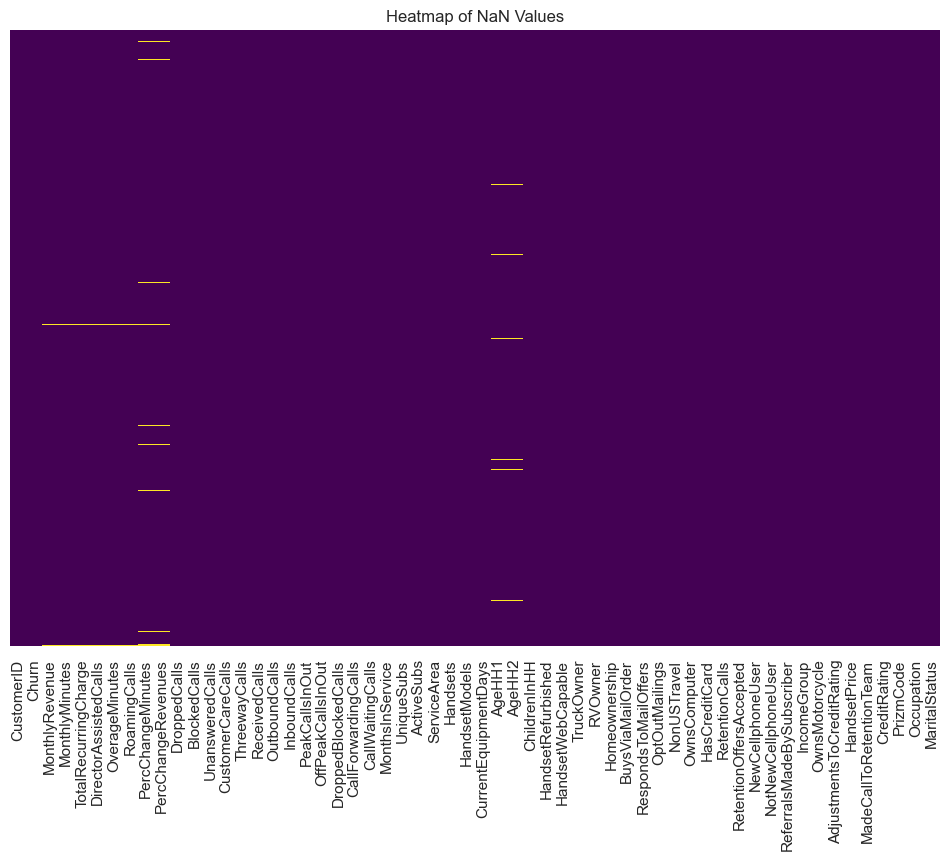

Missing Values  Percentage
MonthlyRevenue                    156    0.305601
MonthlyMinutes                    156    0.305601
TotalRecurringCharge              156    0.305601
DirectorAssistedCalls             156    0.305601
OverageMinutes                    156    0.305601
RoamingCalls                      156    0.305601
PercChangeMinutes                 367    0.718945
PercChangeRevenues                367    0.718945
ServiceArea                        24    0.047015
Handsets                            1    0.001959
HandsetModels                       1    0.001959
CurrentEquipmentDays                1    0.001959
AgeHH1                            909    1.780712
AgeHH2                            909    1.780712

In [6]:
# Check for nan values
import matplotlib.pyplot as plt
import seaborn as sns
# Checking for missing data numerically
missing_data = telecom_data.isna().sum()
missing_percentage = (missing_data / len(telecom_data)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of NaN values (missing data)
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of NaN Values")
plt.show()

missing_data_summary

In [7]:
# # Pair plot
# import seaborn as sns

# # Plot pairplot for numerical columns
# sns.pairplot(telecom_data)
# plt.suptitle('Pair Plot of Numerical Columns in Telecom Data')
# plt.show()


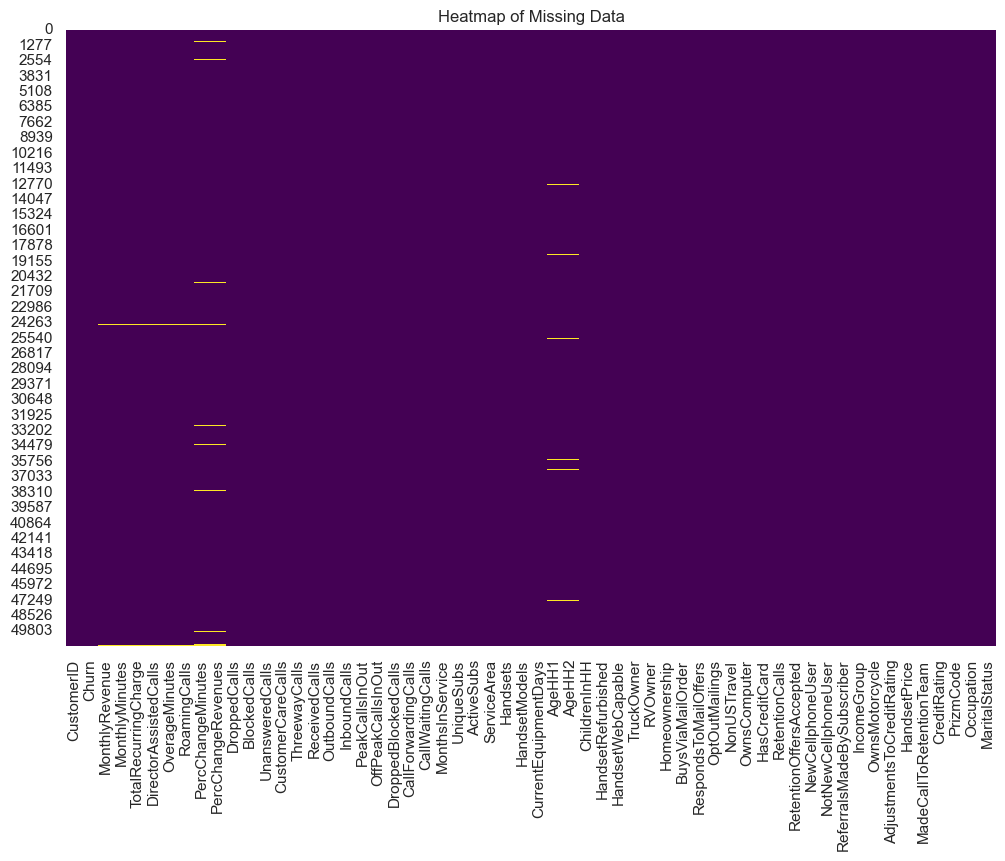

Missing Values  Percentage
MonthlyRevenue                    156    0.305601
MonthlyMinutes                    156    0.305601
TotalRecurringCharge              156    0.305601
DirectorAssistedCalls             156    0.305601
OverageMinutes                    156    0.305601
RoamingCalls                      156    0.305601
PercChangeMinutes                 367    0.718945
PercChangeRevenues                367    0.718945
ServiceArea                        24    0.047015
Handsets                            1    0.001959
HandsetModels                       1    0.001959
CurrentEquipmentDays                1    0.001959
AgeHH1                            909    1.780712
AgeHH2                            909    1.780712

In [8]:
# Check for missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data numerically
missing_data = telecom_data.isnull().sum()
missing_percentage = (missing_data / len(telecom_data)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# Display missing data numerically
missing_data_summary


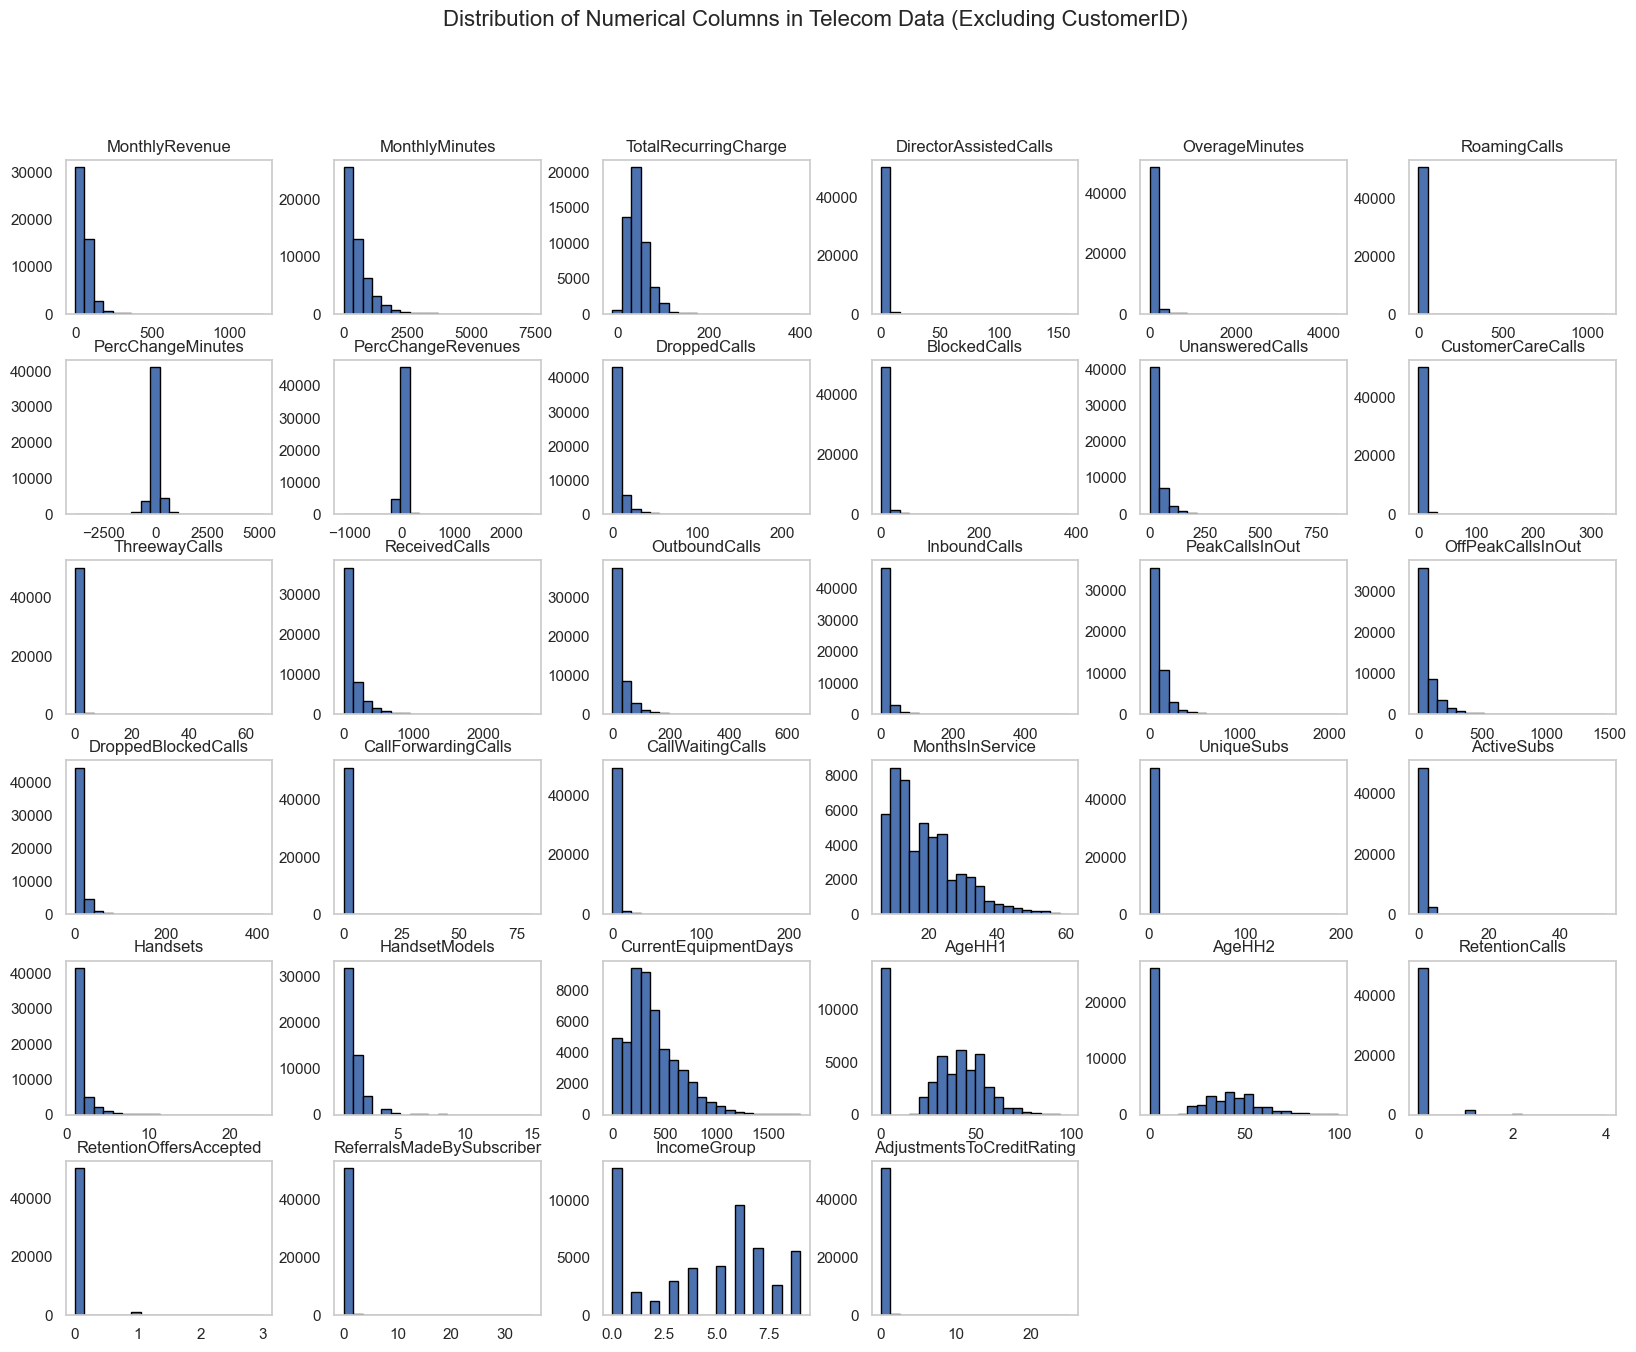

In [9]:
import matplotlib.pyplot as plt

# Exclude 'CustomerID' column and plot histograms for remaining numerical columns
axes = telecom_data.drop(columns='CustomerID').hist(figsize=(20, 15), bins=20, edgecolor='black')

# Loop through each axis to disable the grid
for ax in axes.flatten():
    ax.grid(False)  # Remove the grid for each subplot

# Add the title
plt.suptitle('Distribution of Numerical Columns in Telecom Data (Excluding CustomerID)', fontsize=16)
plt.show()


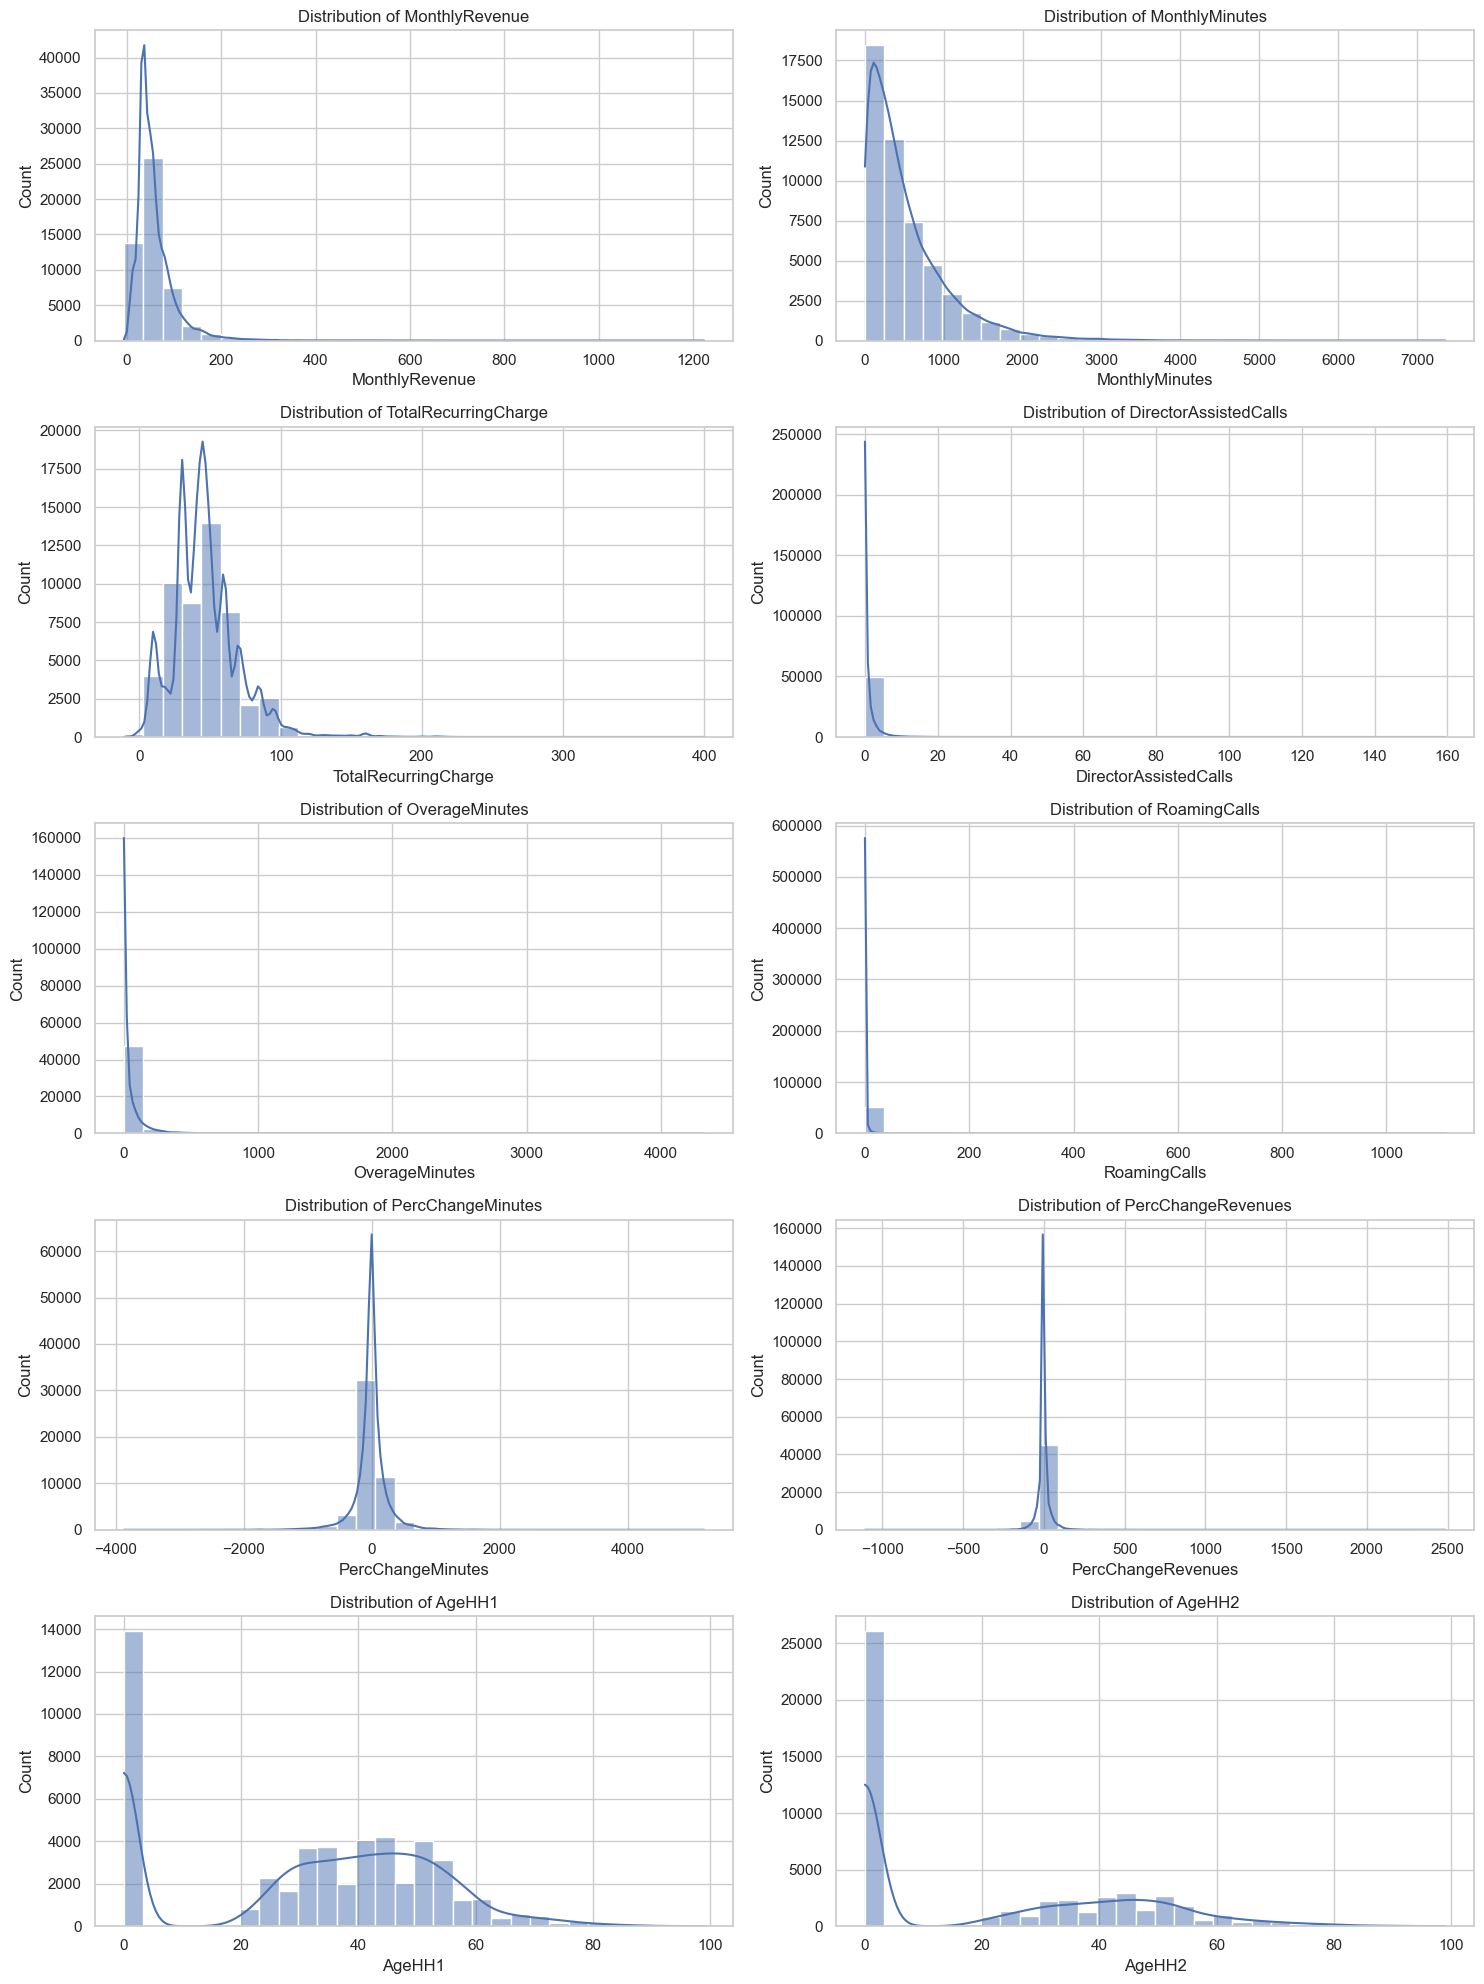

In [10]:
# Print the distribution
# Importing necessary libraries for plotting distributions
numerical_columns_with_missing = ['MonthlyRevenue', 'MonthlyMinutes',       'TotalRecurringCharge', 
                                  'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
                                  'PercChangeMinutes', 'PercChangeRevenues', 'AgeHH1', 'AgeHH2']

# Plotting distributions of numerical columns with missing values
plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns_with_missing, 1):
    plt.subplot(5, 2, i)
    sns.histplot(telecom_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


The distribution analysis of the numerical columns with missing values reveals several important patterns. For columns like MonthlyRevenue, MonthlyMinutes, and TotalRecurringCharge, the data is heavily skewed to the right, indicating that the majority of customers have relatively low values, with a few outliers showing much higher amounts. Similarly, columns such as DirectorAssistedCalls, OverageMinutes, and RoamingCalls are highly concentrated around zero, suggesting that most customers rarely use these services, with only a small number of individuals exhibiting much higher usage. In contrast, the columns PercChangeMinutes and PercChangeRevenues show sharp, narrow distributions with significant outliers, implying that most customers experience minor changes in usage and revenue, but a few have large fluctuations. Finally, the age-related columns, AgeHH1 and AgeHH2, follow a more normal distribution, though AgeHH2 (which could represent the second household member) is skewed towards younger ages. Given the presence of skewed distributions and outliers in most columns, median imputation is an appropriate choice to handle missing values, as it is more resistant to the effects of outliers compared to mean imputation. Therefore, proceeding with median imputation ensures the missing data is handled in a robust manner that aligns with the underlying distributions.

In [11]:
# Handling missing values in numerical columns using median imputation
# Selecting numerical columns with missing values
numerical_columns = telecom_data.select_dtypes(include=['float64', 'int64']).columns

# Imputing missing values with the median of each column
telecom_data[numerical_columns] = telecom_data[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Verifying if missing values have been handled
missing_data_after_imputation = telecom_data.isnull().sum()
missing_data_after_imputation[numerical_columns]


CustomerID                   0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
RetentionCalls               0
RetentionOffersAccepted      0
Referral

In [12]:
# For categorical columns:
# Selecting categorical columns and checking for missing values
categorical_columns = telecom_data.select_dtypes(include=['object','category']).columns
missing_categorical_data = telecom_data[categorical_columns].isnull().sum()
missing_categorical_data = missing_categorical_data[missing_categorical_data > 0]

# Display missing categorical data summary
missing_categorical_data


ServiceArea    24
dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\3855071392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\3855071392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\3855071392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp

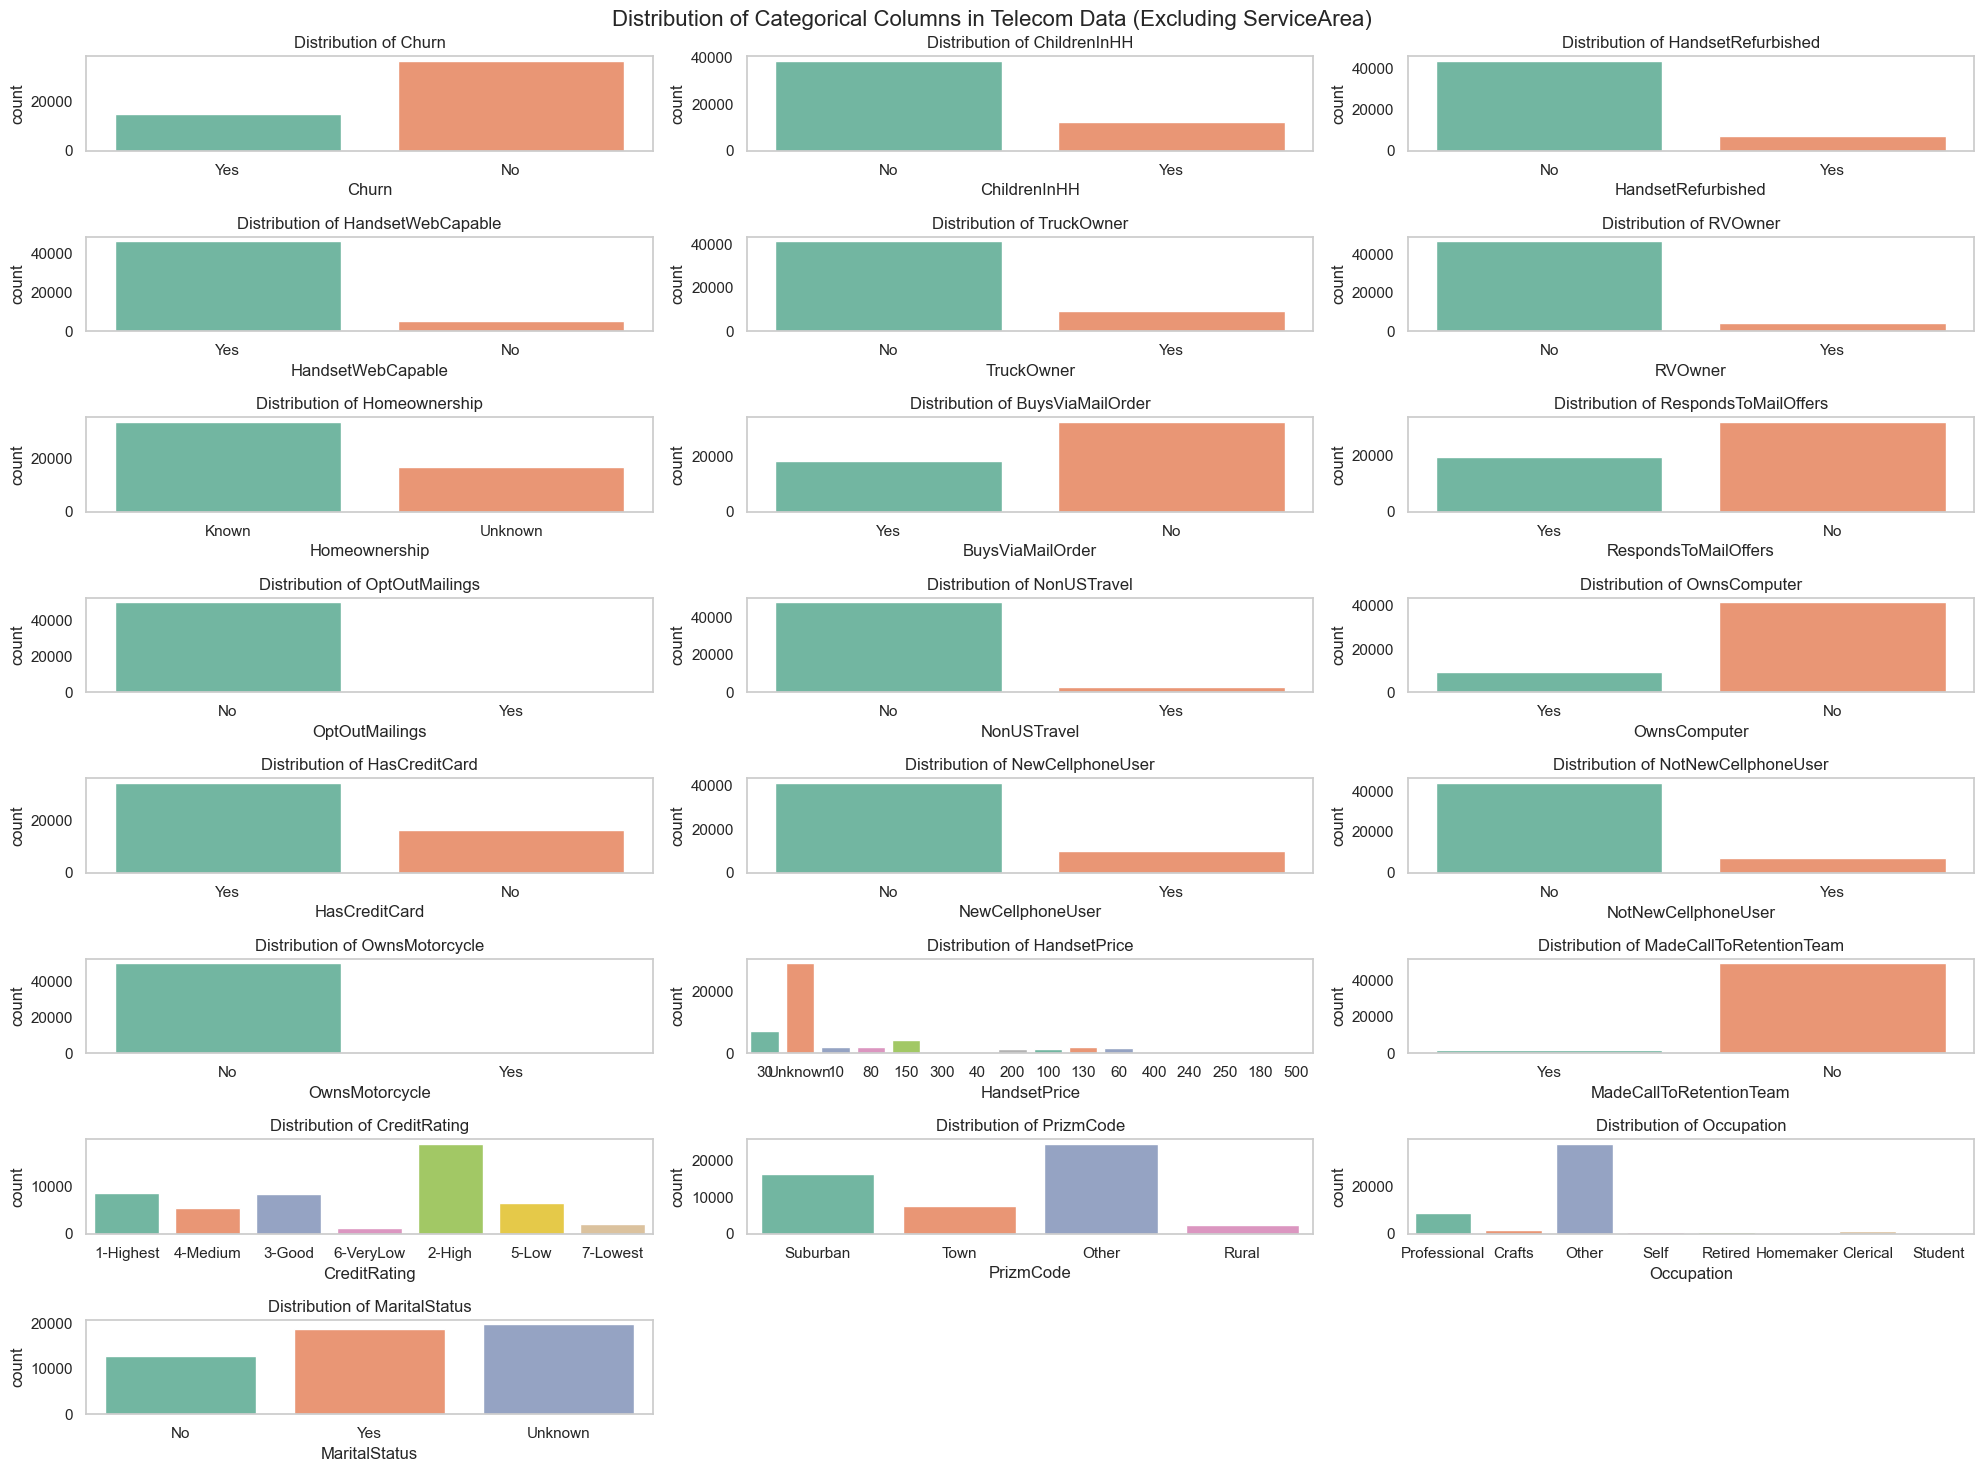

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns, excluding 'ServiceArea'
categorical_columns = telecom_data.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop('ServiceArea')  # Exclude 'ServiceArea'

# Create subplots for each categorical column
fig, axes = plt.subplots(len(categorical_columns) // 3 + 1, 3, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through categorical columns and plot bar plots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=telecom_data, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(False)  # Remove the grid for each subplot

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a global title
plt.suptitle('Distribution of Categorical Columns in Telecom Data (Excluding ServiceArea)', fontsize=16)
plt.tight_layout()
plt.show()


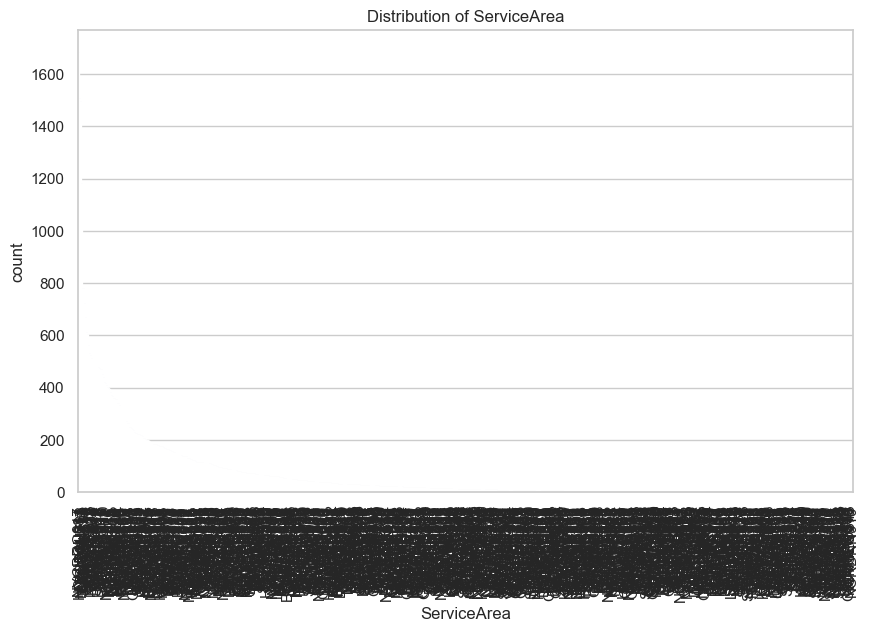

In [14]:
# Plotting the distribution of the 'ServiceArea' column to inspect its distribution before imputation
plt.figure(figsize=(10, 6))
sns.countplot(x=telecom_data['ServiceArea'], order=telecom_data['ServiceArea'].value_counts().index)
plt.title('Distribution of ServiceArea')
plt.xticks(rotation=90)
plt.show()


In [15]:
telecom_data.ServiceArea

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

Given the missing values in the ServiceArea column and the highly skewed distribution of the data, I have decided to drop the rows where the ServiceArea is missing. Since imputation of these values may not be logical without a clear basis for determining which area to assign to each missing entry, it could introduce inaccuracies or bias into the analysis. Moreover, because the number of missing values is relatively small (only 24 rows), dropping these records will have a minimal impact on the overall dataset. This approach ensures that we avoid any potential errors that could arise from incorrect imputation of this critical geographic variable.

In [16]:
# Dropping rows where 'ServiceArea' is missing
telecom_data_cleaned = telecom_data.dropna(subset=['ServiceArea'])

# Verifying if any missing values remain in 'ServiceArea'
telecom_data_cleaned['ServiceArea'].isnull().sum()


0

In [17]:
# Checking for any remaining missing values in the entire dataset
missing_data_overall = telecom_data_cleaned.isnull().sum()
missing_data_overall[missing_data_overall > 0]


Series([], dtype: int64)

In [18]:
telecom_data_cleaned['Churn']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51023, dtype: object

# Detect outlier for numerical columns

In [19]:
# import numpy as np
# from scipy import stats

# # Select only numeric columns from the DataFrame
# numeric_columns = telecom_data_cleaned.select_dtypes(include=[np.number]).columns

# # Calculate the Z-scores for numeric columns only
# z_scores = np.abs(stats.zscore(telecom_data_cleaned[numeric_columns]))

# # Define a threshold for what is considered an outlier (e.g., Z > 3)
# threshold = 3

# # Filter the DataFrame, keeping only rows where all Z-scores are below the threshold
# telecom_data_cleaned = telecom_data_cleaned[(z_scores < threshold).all(axis=1)]

# # Reset the index of the filtered DataFrame
# telecom_data_cleaned = telecom_data_cleaned.reset_index(drop=True)

# # Show the DataFrame without outliers
# telecom_data_cleaned


In [20]:
telecom_data_cleaned.RetentionCalls.describe()

count    51023.000000
mean         0.037199
std          0.206486
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: RetentionCalls, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\955337851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_data_cleaned['Churn'] = telecom_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


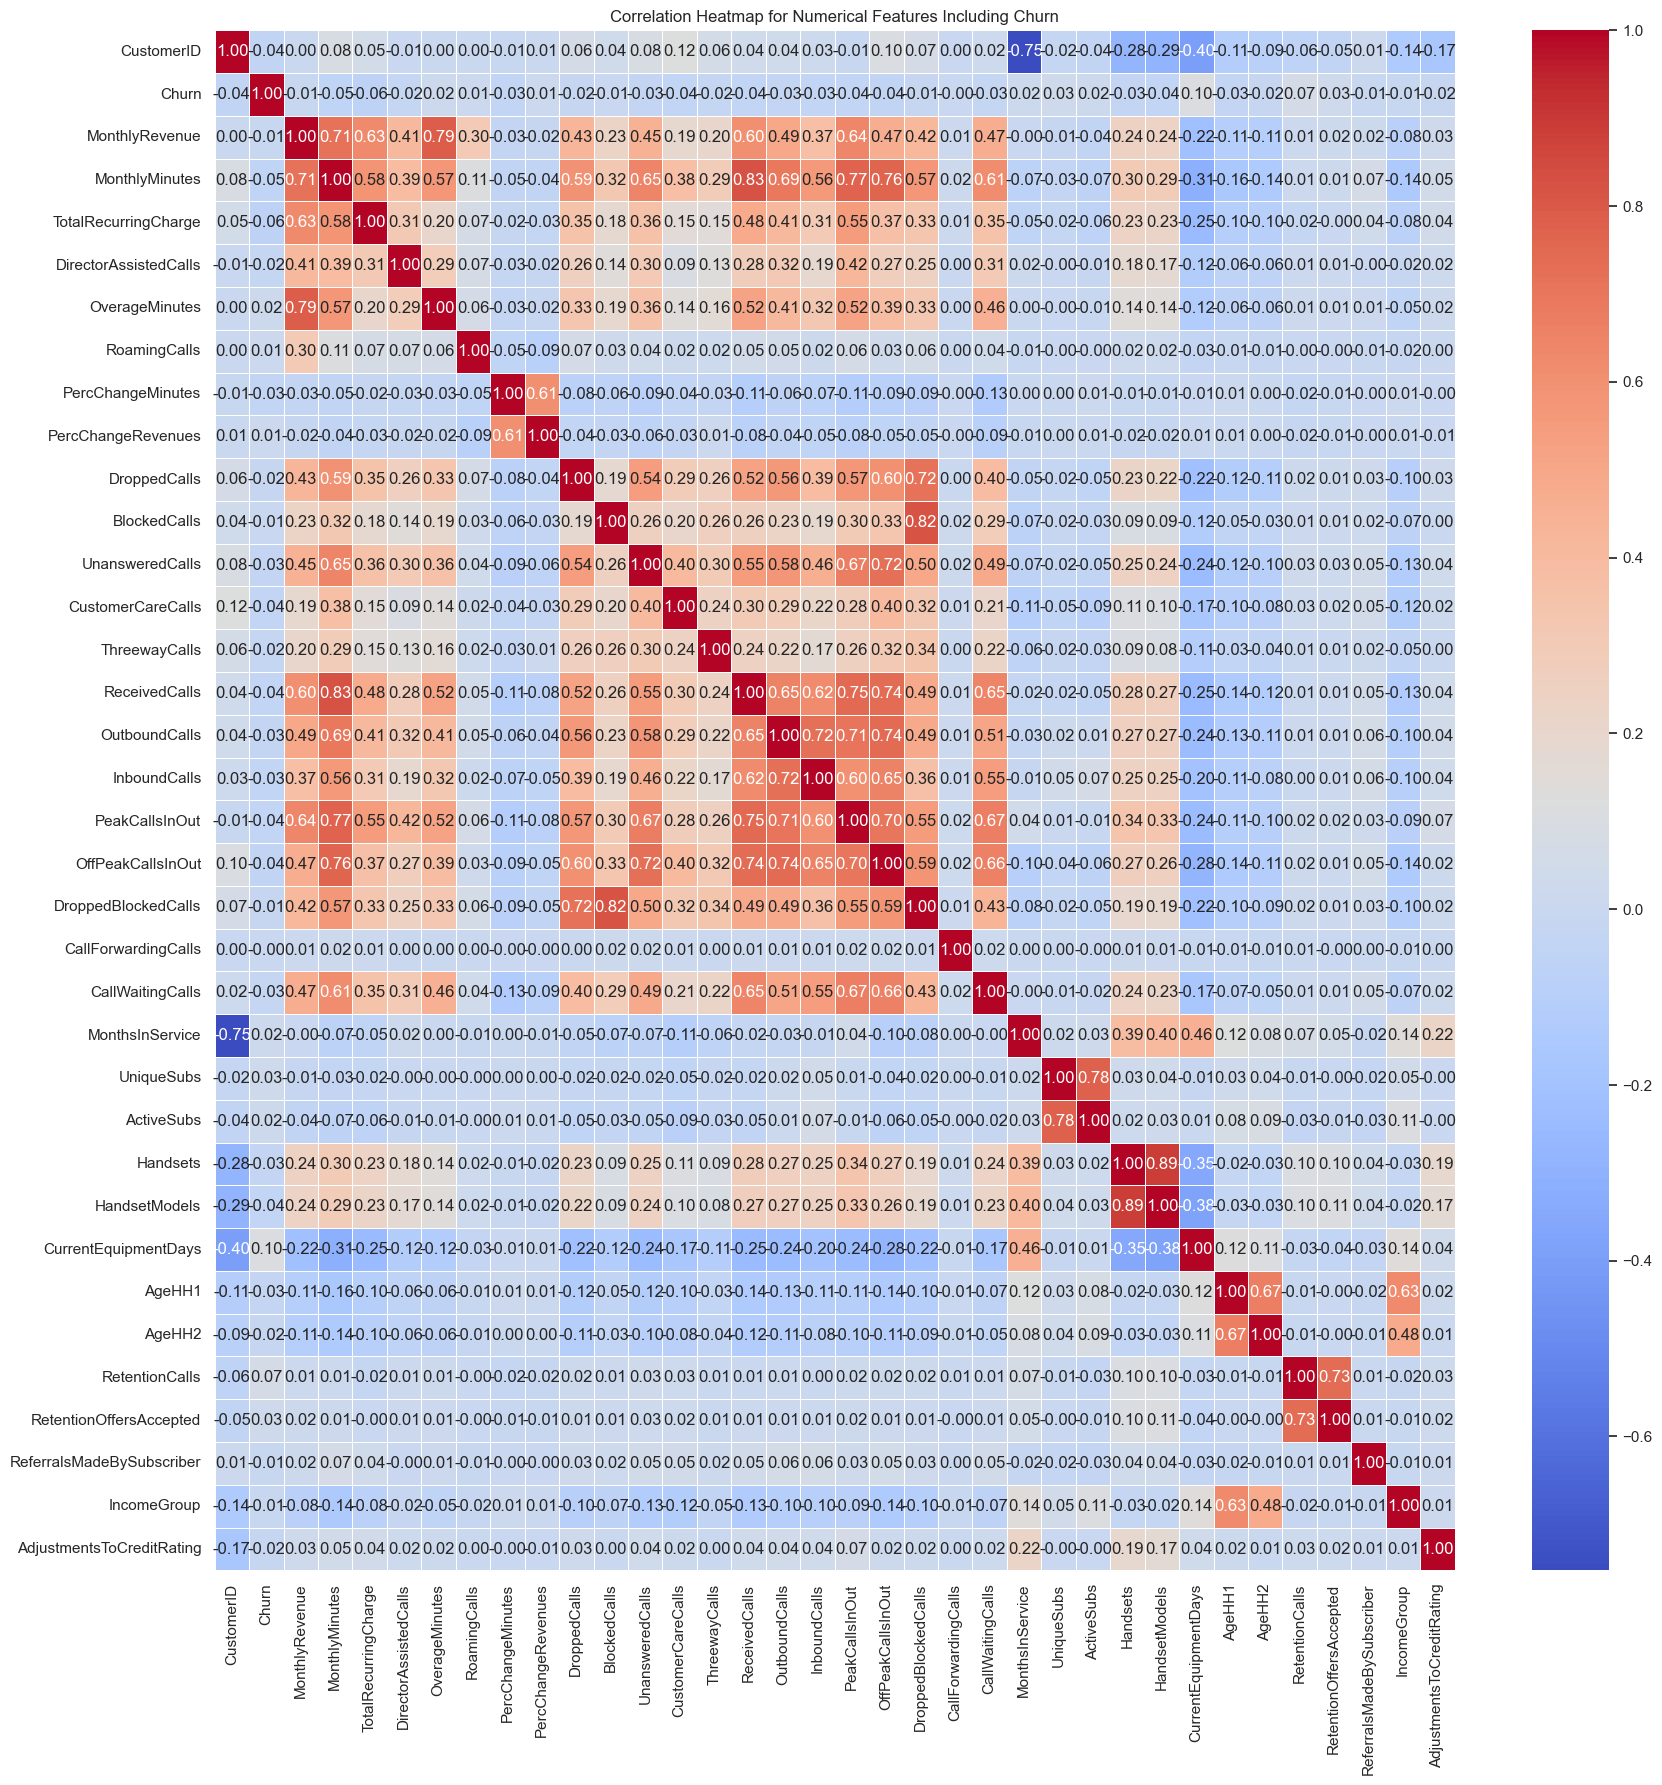

In [21]:
import numpy as np
# Encoding the 'Churn' column to perform correlation analysis (Yes=1, No=0)
telecom_data_cleaned['Churn'] = telecom_data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Selecting only the numerical columns for correlation analysis
numerical_data = telecom_data_cleaned.select_dtypes(include=[np.number])

# Adding the encoded churn column to the numerical data
numerical_data['Churn'] = telecom_data_cleaned['Churn']

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Extracting correlation values with 'Churn_Encoded'
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Displaying the correlations with 'Churn_Encoded'

# Plotting a heatmap for the correlation matrix including 'Churn_Encoded'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features Including Churn")
plt.show()


In [22]:
telecom_data_cleaned.Churn.describe()

count    51023.000000
mean         0.288086
std          0.452876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn, dtype: float64

The overall weak correlations imply that churn is not driven by any single numerical factor. Instead, churn behavior is likely influenced by a combination of small effects from various features or non-numerical aspects, such as customer behavior, satisfaction, or external factors not captured by the numerical data.

identify and visualize the highly correlated features in the dataset and suggest which ones can be dropped or combined. 

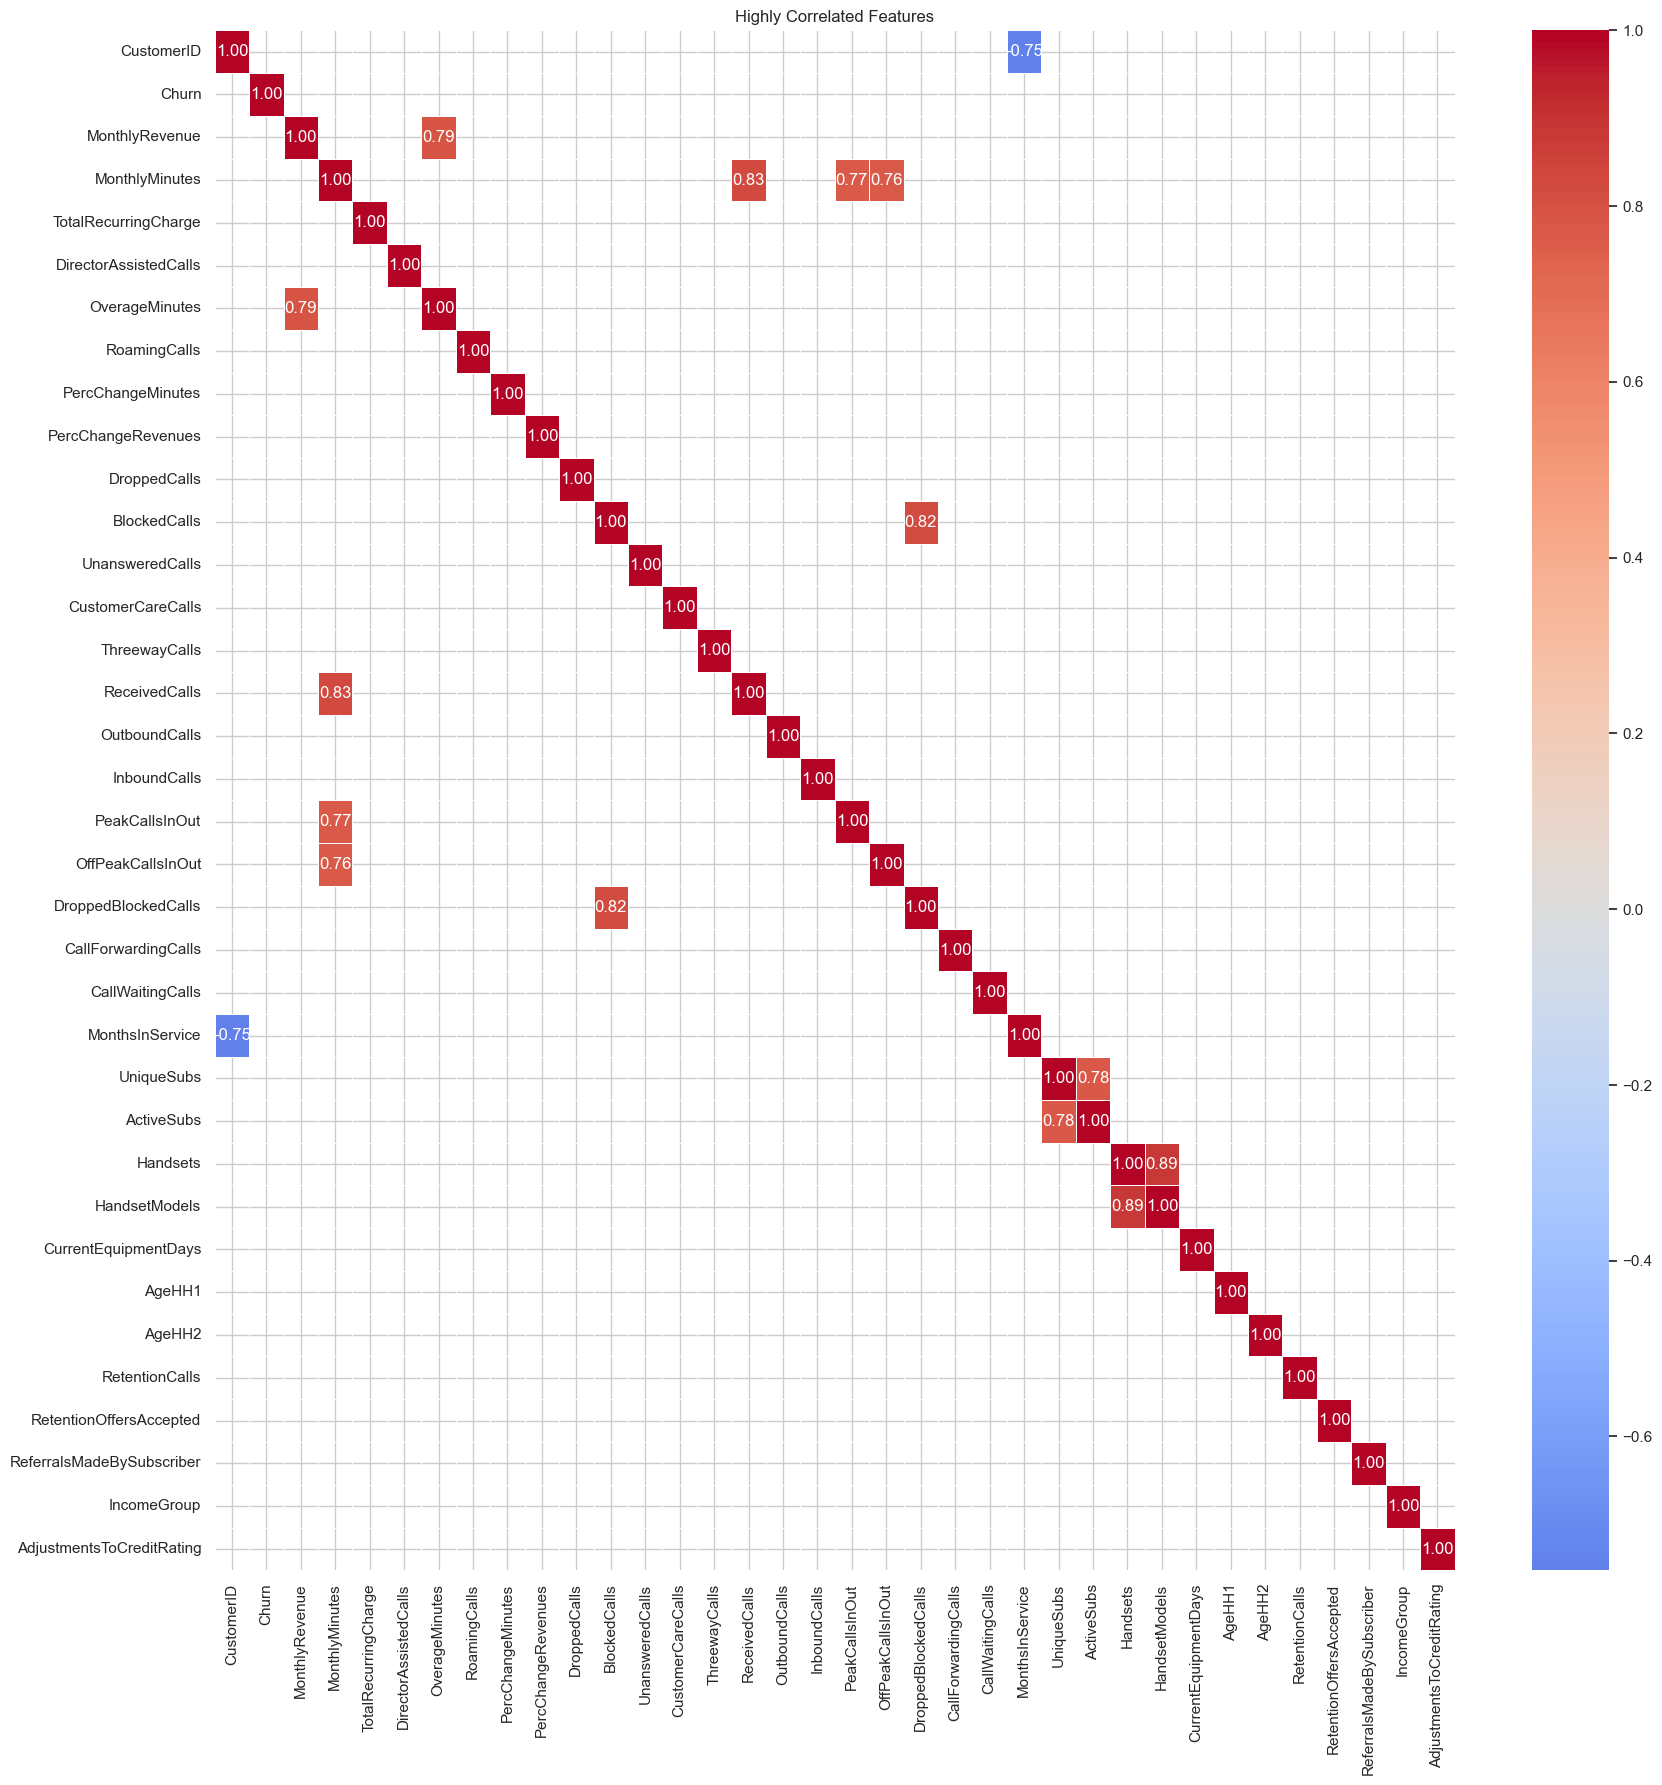

In [23]:
# Visualizing highly correlated features in the dataset
import numpy as np
# First, setting a correlation threshold (e.g., above 0.8 or below -0.8) for high correlations
correlation_threshold = 0.75

# Extracting the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Masking the correlation matrix lower triangle and filtering for highly correlated features
high_correlation = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Visualizing only the highly correlated features
plt.figure(figsize=(20, 20))
sns.heatmap(high_correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Highly Correlated Features")
plt.show()



In [24]:
# Creating a matrix for highly correlated pairs based on the threshold (0.75)
correlation_threshold = 0.75
highly_correlated_matrix = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Removing self-correlations (correlation of a feature with itself)
highly_correlated_matrix = highly_correlated_matrix.where(np.triu(np.ones(highly_correlated_matrix.shape), k=1).astype(bool))

# Displaying the highly correlated matrix as a table format
highly_correlated_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)  # Removing rows and columns with all NaN values



OverageMinutes  ReceivedCalls  PeakCallsInOut  \
CustomerID                 NaN            NaN             NaN   
MonthlyRevenue        0.787854            NaN             NaN   
MonthlyMinutes             NaN       0.828008         0.77034   
BlockedCalls               NaN            NaN             NaN   
UniqueSubs                 NaN            NaN             NaN   
Handsets                   NaN            NaN             NaN   

                OffPeakCallsInOut  DroppedBlockedCalls  MonthsInService  \
CustomerID                    NaN                  NaN        -0.752286   
MonthlyRevenue                NaN                  NaN              NaN   
MonthlyMinutes           0.763835                  NaN              NaN   
BlockedCalls                  NaN             0.816267              NaN   
UniqueSubs                    NaN                  NaN              NaN   
Handsets                      NaN                  NaN              NaN   

                ActiveSubs  HandsetModels  
CustomerID             NaN            NaN  
MonthlyRevenue         NaN            NaN  
MonthlyMinutes         NaN            NaN  
BlockedCalls           NaN            NaN  
UniqueSubs        0.775716            NaN  
Handsets               NaN       0.887848

In [25]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set a correlation threshold (e.g., 0.75)
correlation_threshold = 0.75

# Identify highly correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[(highly_correlated_pairs > correlation_threshold) & (highly_correlated_pairs < 1)]

# Display the results
print(highly_correlated_pairs)


HandsetModels        Handsets               0.887848
Handsets             HandsetModels          0.887848
MonthlyMinutes       ReceivedCalls          0.828008
ReceivedCalls        MonthlyMinutes         0.828008
BlockedCalls         DroppedBlockedCalls    0.816267
DroppedBlockedCalls  BlockedCalls           0.816267
MonthlyRevenue       OverageMinutes         0.787854
OverageMinutes       MonthlyRevenue         0.787854
UniqueSubs           ActiveSubs             0.775716
ActiveSubs           UniqueSubs             0.775716
MonthlyMinutes       PeakCallsInOut         0.770340
PeakCallsInOut       MonthlyMinutes         0.770340
OffPeakCallsInOut    MonthlyMinutes         0.763835
MonthlyMinutes       OffPeakCallsInOut      0.763835
dtype: float64


The dataset contains several highly correlated feature pairs, which indicates redundancy in the information they provide. For example, MonthlyRevenue and OverageMinutes have a correlation of 0.79, suggesting that customers with higher overage minutes also tend to spend more. Similarly, MonthlyMinutes is highly correlated with both ReceivedCalls (0.83) and PeakCallsInOut (0.77), indicating overlapping information about customer usage. Features like BlockedCalls and DroppedBlockedCalls (0.82), UniqueSubs and ActiveSubs (0.78), as well as Handsets and HandsetModels (0.89), also show strong correlations.

To avoid redundancy and multicollinearity in any further analysis, we recommend dropping one feature from each highly correlated pair. Specifically, OverageMinutes, ReceivedCalls, PeakCallsInOut, DroppedBlockedCalls, UniqueSubs, and HandsetModels can be dropped, as their corresponding highly correlated counterparts (e.g., MonthlyRevenue, MonthlyMinutes, BlockedCalls, ActiveSubs, and Handsets) already capture the necessary information. Additionally, since CustomerID is simply an identifier with no analytical value, it should be removed. By doing so, the dataset will become more streamlined, reducing complexity without losing key insights.

In [26]:
# Remove redundance data from telecom_data_cleaned
columns_to_drop = ['OverageMinutes', 'ReceivedCalls', 'PeakCallsInOut', 'DroppedBlockedCalls', 
                   'UniqueSubs', 'HandsetModels', 'CustomerID']

# Drop the specified columns
telecom_data_cleaned= telecom_data_cleaned.drop(columns=columns_to_drop)

In [27]:
telecom_data_cleaned

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0          1           24.00           219.0                  22.0   
1          1           16.99            10.0                  17.0   
2          0           38.00             8.0                  38.0   
3          0           82.28          1312.0                  75.0   
4          1           17.14             0.0                  17.0   
...      ...             ...             ...                   ...   
51042      1           48.46           366.0                  45.0   
51043      0           95.17          1745.0                  85.0   
51044      1           48.46           366.0                  45.0   
51045      0           48.46           366.0                  45.0   
51046      0           48.46           366.0                  45.0   

       DirectorAssistedCalls  RoamingCalls  PercChangeMinutes  \
0                       0.25           0.0             -157.0   
1                       0.00           0.0               -4.0   
2                       0.00           0.0               -2.0   
3                       1.24           0.0              157.0   
4                       0.00           0.0                0.0   
...                      ...           ...                ...   
51042                   0.25           0.0               -5.0   
51043                   0.99           4.7              122.0   
51044                   0.25           0.0               -5.0   
51045                   0.25           0.0               -5.0   
51046                   0.25           0.0               -5.0   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...  \
0                   -19.0           0.7           0.7  ...   
1                     0.0           0.3           0.0  ...   
2                     0.0           0.0           0.0  ...   
3                     8.1          52.0           7.7  ...   
4                    -0.2           0.0           0.0  ...   
...                   ...           ...           ...  ...   
51042                -0.3           9.3           2.7  ...   
51043                15.9          16.7           0.7  ...   
51044                -0.3          71.7           4.3  ...   
51045                -0.3           0.0           0.0  ...   
51046                -0.3          18.7           0.7  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                              0            4              No   
1                              0            5              No   
2                              0            6              No   
3                              0            6              No   
4                              0            9              No   
...                          ...          ...             ...   
51042                          0            6              No   
51043                          0            9              No   
51044                          0            7              No   
51045                          0            9              No   
51046                          0            0              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
0                              0            30                      Yes   
1                              0            30                       No   
2                              0       Unknown                       No   
3                              0            10                       No   
4                              1            10                       No   
...                          ...           ...                      ...   
51042                          0            60                       No   
51043                          1            60                       No   
51044                          1            80                       No   
51045                          0            30                       No   
51046                          1  

In [28]:
import numpy as np
from scipy import stats

# Select only numeric columns from the DataFrame
numeric_columns = telecom_data_cleaned.select_dtypes(include=[np.number]).columns

# Calculate the Z-scores for numeric columns only
z_scores = np.abs(stats.zscore(telecom_data_cleaned[numeric_columns]))

# Define a threshold for what is considered an outlier (e.g., Z > 3.1)
threshold = 3.1

# Filter the DataFrame, keeping only rows where all Z-scores are below the threshold
telecom_data_cleaned = telecom_data_cleaned[(z_scores < threshold).all(axis=1)]

# Reset the index of the filtered DataFrame
telecom_data_cleaned = telecom_data_cleaned.reset_index(drop=True)

# Show the DataFrame without outliers
telecom_data_cleaned


Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0          0           70.19           797.0                  60.0   
1          1           30.86           181.0                  30.0   
2          0          104.75          1166.0                  75.0   
3          1           27.25             0.0                  27.0   
4          0           32.27           112.0                  32.0   
...      ...             ...             ...                   ...   
41268      0           71.99           724.0                  70.0   
41269      1          117.49           384.0                  30.0   
41270      1           48.46           366.0                  45.0   
41271      0           95.17          1745.0                  85.0   
41272      0           48.46           366.0                  45.0   

       DirectorAssistedCalls  RoamingCalls  PercChangeMinutes  \
0                       0.00           0.0               -9.0   
1                       0.50           0.1             -146.0   
2                       5.45           0.5             -119.0   
3                       0.00           0.0                0.0   
4                       0.00           0.0               -2.0   
...                      ...           ...                ...   
41268                   0.00           0.9              -40.0   
41269                   0.00           0.0                0.0   
41270                   0.25           0.0               -5.0   
41271                   0.99           4.7              122.0   
41272                   0.25           0.0               -5.0   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...  \
0                    -9.4           7.7           4.0  ...   
1                    -0.9           2.3           3.7  ...   
2                    -1.9           1.7           6.3  ...   
3                    -0.2           0.0           0.0  ...   
4                    -0.3           1.7           0.0  ...   
...                   ...           ...           ...  ...   
41268                -2.0          14.3           1.0  ...   
41269                 0.0           4.0           1.0  ...   
41270                -0.3           9.3           2.7  ...   
41271                15.9          16.7           0.7  ...   
41272                -0.3           0.0           0.0  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                              0            5              No   
1                              0            4              No   
2                              0            0              No   
3                              0            8              No   
4                              0            4              No   
...                          ...          ...             ...   
41268                          0            7              No   
41269                          0            2              No   
41270                          0            6              No   
41271                          0            9              No   
41272                          0            9              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
0                              1            30                       No   
1                              0            10                       No   
2                              0            30                       No   
3                              0            10                       No   
4                              1            30                       No   
...                          ...           ...                      ...   
41268                          0       Unknown                       No   
41269                          0            30                       No   
41270                          0            60                       No   
41271                          1            60                       No   
41272                          0  

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\4133013799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\4133013799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\4133013799.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
C:\Users\lenovo\AppData\Local\Temp\ipykerne

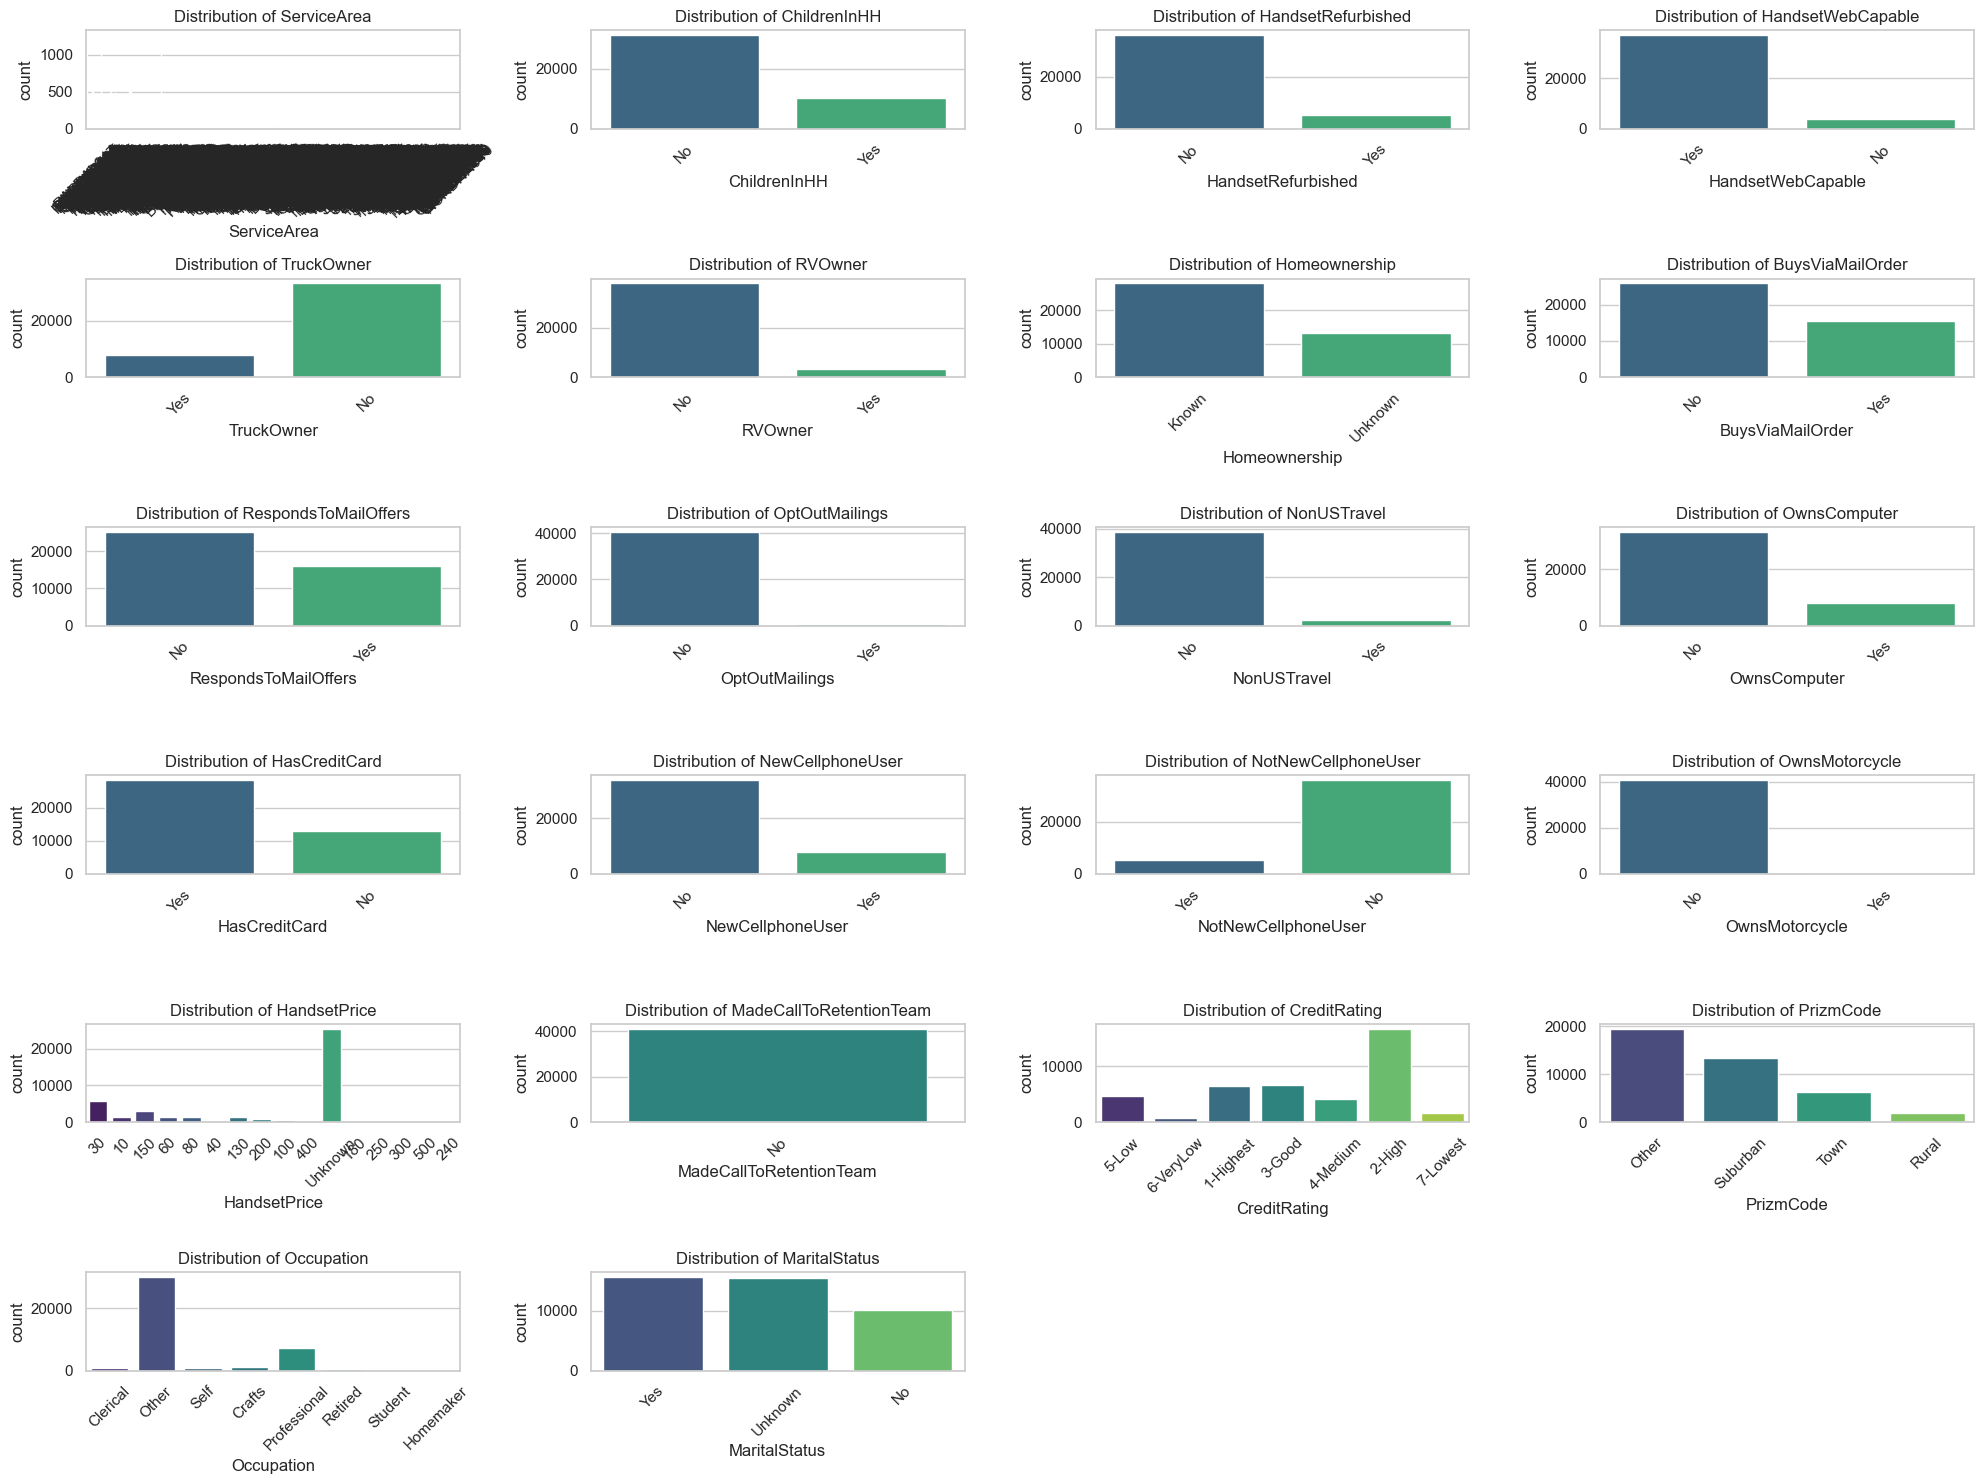

In [29]:
# Extracting categorical columns from the dataset
categorical_columns = telecom_data_cleaned.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical column
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size for better visibility
plt.figure(figsize=(20, 15))

# Plotting each categorical column's distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 4, i)
    sns.countplot(x=telecom_data_cleaned[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pandas as pd

# Make a copy of the original DataFrame to avoid altering it directly
telecom_data_encoded = telecom_data_cleaned.copy()

# Define the columns to encode or map
multi_class_cols = ["PrizmCode", "Occupation"]
label_encoding_cols = ["CreditRating", "HandsetPrice"]
frequency_encoding_cols = ["ServiceArea"]
mapping = {"Yes": 1, "No": 0, "Known": 1, "Unknown": 0}

# Get the list of categorical columns excluding multi_class_cols, label_encoding_cols, and frequency_encoding_cols
cat_col = telecom_data_encoded.select_dtypes(include=['object']).columns.to_list()
columns_to_map = [col for col in cat_col if col not in (multi_class_cols + label_encoding_cols + frequency_encoding_cols)]

# Apply the mapping to the remaining categorical columns
telecom_data_encoded[columns_to_map] = telecom_data_encoded[columns_to_map].replace(mapping)

# Apply label encoding to label_encoding_cols
label_encoder = LabelEncoder()
for col in label_encoding_cols:
    telecom_data_encoded[col] = label_encoder.fit_transform(telecom_data_encoded[col])

# Apply one-hot encoding to multi_class_cols, converting True/False to 0/1
telecom_data_encoded = pd.get_dummies(telecom_data_encoded, columns=multi_class_cols, dtype='int')

# Apply frequency encoding to frequency_encoding_cols
for col in frequency_encoding_cols:
    freq_encoding = telecom_data_encoded[col].value_counts(normalize=True)
    telecom_data_encoded[col] = telecom_data_encoded[col].map(freq_encoding)

# Now perform chi-square tests on the encoded data
# Initializing a DataFrame to store chi-square results
chi2_results = []

# Loop through each remaining categorical column to perform chi-square test with 'Churn'
for column in telecom_data_encoded.columns:
    if column != 'Churn':  # Skipping the target variable
        # Creating a contingency table for the chi-square test
        contingency_table = pd.crosstab(telecom_data_encoded[column], telecom_data_encoded['Churn'])
        
        # Performing the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Storing the results
        chi2_results.append((column, chi2, p))

# Converting results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results, columns=['Column', 'Chi2', 'P-Value'])

# Sorting by P-Value to see significance
chi2_results_df = chi2_results_df.sort_values(by='P-Value')

# Display the chi-square results
chi2_results_df


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\3499857141.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_data_encoded[columns_to_map] = telecom_data_encoded[columns_to_map].replace(mapping)


Column          Chi2        P-Value
17            MonthsInService   1332.689086  2.917215e-251
21       CurrentEquipmentDays   2576.659859  8.303779e-108
2        TotalRecurringCharge    451.778241   8.231077e-39
26          HandsetWebCapable    149.640693   2.077286e-34
46               CreditRating    144.267777   1.258748e-28
5           PercChangeMinutes   1860.738294   1.221205e-13
10          CustomerCareCalls    164.166565   2.675574e-13
20                   Handsets     54.615684   3.910765e-11
25         HandsetRefurbished     40.096009   2.417824e-10
31       RespondsToMailOffers     37.278772   1.023931e-09
30           BuysViaMailOrder     35.232562   2.925903e-09
22                     AgeHH1    115.671853   4.846150e-09
18                 ActiveSubs     36.474215   5.944424e-08
19                ServiceArea    286.975977   5.305836e-07
44               HandsetPrice     57.194685   7.605378e-07
7                DroppedCalls    182.470233   2.332499e-06
13               InboundCalls    274.023873   6.216908e-06
1              MonthlyMinutes   2097.887186   1.202862e-05
4                RoamingCalls    385.091707   5.912031e-05
11              ThreewayCalls     38.072412   7.606500e-05
29              Homeownership     12.166514   4.865516e-04
16           CallWaitingCalls     96.242955   1.193423e-03
41                IncomeGroup     26.791837   1.514048e-03
0              MonthlyRevenue  10224.672462   2.415137e-03
57         Occupation_Retired      8.239623   4.098564e-03
9             UnansweredCalls    520.241790   5.457066e-03
6          PercChangeRevenues   2149.286942   1.317834e-02
55           Occupation_Other      6.058551   1.383912e-02
49            PrizmCode_Rural      5.632627   1.762919e-02
12              OutboundCalls    453.487674   2.045296e-02
23                     AgeHH2     58.369646   2.375874e-02
35              HasCreditCard      4.384902   3.625857e-02
56    Occupation_Professional      3.687065   5.483602e-02
3       DirectorAssistedCalls     54.647112   7.519274e-02
27                 TruckOwner      3.002876   8.311683e-02
40  ReferralsMadeBySubscriber      2.715066   9.940485e-02
38           NewCellphoneUser      2.585498   1.078465e-01
50         PrizmCode_Suburban      2.455631   1.171041e-01
47              MaritalStatus      2.384256   1.225632e-01
24               ChildrenInHH      2.331680   1.267650e-01
39        NotNewCellphoneUser      2.214311   1.367361e-01
51             PrizmCode_Town      2.099016   1.473939e-01
14          OffPeakCallsInOut   1010.293027   1.514110e-01
8                BlockedCalls    129.192842   1.566421e-01
43  AdjustmentsToCreditRating      1.712133   1.907088e-01
28                    RVOwner      1.314175   2.516402e-01
42             OwnsMotorcycle      1.211303   2.710741e-01
34               OwnsComputer      1.086524   2.972427e-01
54       Occupation_Homemaker      1.008199   3.153348e-01
15        CallForwardingCalls      5.599964   3.471089e-01
58            Occupation_Self      0.496936   4.808493e-01
33                NonUSTravel      0.490290   4.837981e-01
48            PrizmCode_Other      0.369992   5.430085e-01
53          Occupation_Crafts      0.364384   5.460814e-01
59         Occupation_Student      0.326544   5.677010e-01
52        Occupation_Clerical      0.320458   5.713327e-01
32             OptOutMailings      0.236200   6.269642e-01
45    MadeCallToRetentionTeam      0.000000   1.000000e+00
37    RetentionOffersAccepted      0.000000   1.000000e+00
36             RetentionCalls      0.000000   1.000000e+00

Based on the chi-square test results, the following columns have p-values greater than 0.05, indicating no significant relationship with the target variable and are candidates for removal.

In [33]:
# Filter the columns that have a P-value larger than 0.05
columns_to_drop = chi2_results_df[chi2_results_df['P-Value'] > 0.05]['Column'].tolist()

# Drop those columns from the telecom_data_encoded dataframe
telecom_data_encoded_filtered = telecom_data_encoded.drop(columns=columns_to_drop)

# Display the columns that were removed
columns_to_drop, telecom_data_encoded_filtered

(['Occupation_Professional',
  'DirectorAssistedCalls',
  'TruckOwner',
  'ReferralsMadeBySubscriber',
  'NewCellphoneUser',
  'PrizmCode_Suburban',
  'MaritalStatus',
  'ChildrenInHH',
  'NotNewCellphoneUser',
  'PrizmCode_Town',
  'OffPeakCallsInOut',
  'BlockedCalls',
  'AdjustmentsToCreditRating',
  'RVOwner',
  'OwnsMotorcycle',
  'OwnsComputer',
  'Occupation_Homemaker',
  'CallForwardingCalls',
  'Occupation_Self',
  'NonUSTravel',
  'PrizmCode_Other',
  'Occupation_Crafts',
  'Occupation_Student',
  'Occupation_Clerical',
  'OptOutMailings',
  'MadeCallToRetentionTeam',
  'RetentionOffersAccepted',
  'RetentionCalls'],
        Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
 0          0           70.19           797.0                  60.0   
 1          1           30.86           181.0                  30.0   
 2          0          104.75          1166.0                  75.0   
 3          1           27.25             0.0                  27.0   
 4        

In [34]:
telecom_data_encoded_filtered.dtypes

Churn                     int64
MonthlyRevenue          float64
MonthlyMinutes          float64
TotalRecurringCharge    float64
RoamingCalls            float64
PercChangeMinutes       float64
PercChangeRevenues      float64
DroppedCalls            float64
UnansweredCalls         float64
CustomerCareCalls       float64
ThreewayCalls           float64
OutboundCalls           float64
InboundCalls            float64
CallWaitingCalls        float64
MonthsInService           int64
ActiveSubs                int64
ServiceArea             float64
Handsets                float64
CurrentEquipmentDays    float64
AgeHH1                  float64
AgeHH2                  float64
HandsetRefurbished        int64
HandsetWebCapable         int64
Homeownership             int64
BuysViaMailOrder          int64
RespondsToMailOffers      int64
HasCreditCard             int64
IncomeGroup               int64
HandsetPrice              int32
CreditRating              int32
PrizmCode_Rural           int32
Occupati

In [35]:
churn_rate = telecom_data_encoded_filtered['Churn'].mean()
churn_rate

0.2855135318489085

In [36]:
telecom_data_cleaned = telecom_data_encoded_filtered

In [37]:
telecom_data_cleaned

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0          0           70.19           797.0                  60.0   
1          1           30.86           181.0                  30.0   
2          0          104.75          1166.0                  75.0   
3          1           27.25             0.0                  27.0   
4          0           32.27           112.0                  32.0   
...      ...             ...             ...                   ...   
41268      0           71.99           724.0                  70.0   
41269      1          117.49           384.0                  30.0   
41270      1           48.46           366.0                  45.0   
41271      0           95.17          1745.0                  85.0   
41272      0           48.46           366.0                  45.0   

       RoamingCalls  PercChangeMinutes  PercChangeRevenues  DroppedCalls  \
0               0.0               -9.0                -9.4           7.7   
1               0.1             -146.0                -0.9           2.3   
2               0.5             -119.0                -1.9           1.7   
3               0.0                0.0                -0.2           0.0   
4               0.0               -2.0                -0.3           1.7   
...             ...                ...                 ...           ...   
41268           0.9              -40.0                -2.0          14.3   
41269           0.0                0.0                 0.0           4.0   
41270           0.0               -5.0                -0.3           9.3   
41271           4.7              122.0                15.9          16.7   
41272           0.0               -5.0                -0.3           0.0   

       UnansweredCalls  CustomerCareCalls  ...  Homeownership  \
0                 35.3                0.3  ...              1   
1                 19.3                6.3  ...              1   
2                 22.7                0.0  ...              0   
3                  0.0                0.0  ...              1   
4                 13.3                0.0  ...              1   
...                ...                ...  ...            ...   
41268             23.3                0.0  ...              1   
41269             27.0                0.0  ...              1   
41270             48.3                0.0  ...              1   
41271             41.3                0.0  ...              1   
41272              0.0                0.0  ...              0   

       BuysViaMailOrder  RespondsToMailOffers  HasCreditCard  IncomeGroup  \
0                     0                     0              1            5   
1                     0                     0              1            4   
2                     0                     0              0            0   
3                     0                     0              1            8   
4                     1                     1              0            4   
...                 ...                   ...            ...          ...   
41268                 1                     1              1            7   
41269                 0                     0              1            2   
41270                 1                     1              1            6   
41271                 1                     1              1            9   
41272                 0                     0              0            9   

       HandsetPrice  CreditRating  PrizmCode_Rural  Occupation_Other  \
0                 8             4                0                 0   
1                 0             5                0                 1   
2                 8             0                0                 1   
3                 0             0                0                 1   
4                 8             0                0                 1   
...             ...           ...              ...               ...   
41268            15             0          

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume 'telecom_data_cleaned' is your original DataFrame

# Step 1: Exclude 'Churn' from the numerical columns to scale
numerical_columns = telecom_data_cleaned.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop('Churn', errors='ignore')  # Exclude 'Churn' from the scaling

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Apply the scaler only to the selected numerical columns
df_scaled = pd.DataFrame(scaler.fit_transform(telecom_data_cleaned[numerical_columns]), columns=numerical_columns)

df_scaled.reset_index(drop=True, inplace=True)
telecom_data_cleaned.reset_index(drop=True, inplace=True)

# Step 4: Concatenate the scaled numerical columns with the unscaled 'Churn' column and others
telecom_data_cleaned_scaled = pd.concat([df_scaled, telecom_data_cleaned['Churn']], axis=1)

# Step 5: Display the first few rows of the resulting DataFrame
print(telecom_data_cleaned_scaled.head())


   MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  RoamingCalls  \
0        0.730893        1.085318              0.831516     -0.292264   
1       -0.723733       -0.640185             -0.719006     -0.252922   
2        2.009101        2.118940              1.606777     -0.095551   
3       -0.857250       -1.147192             -0.874059     -0.292264   
4       -0.671584       -0.833464             -0.615638     -0.292264   

   PercChangeMinutes  PercChangeRevenues  DroppedCalls  UnansweredCalls  \
0          -0.014466           -0.372822      0.610405         0.623203   
1          -0.820403            0.006871     -0.387336        -0.069224   
2          -0.661569           -0.037799     -0.498196         0.077916   
3           0.038479            0.038140     -0.812300        -0.904466   
4           0.026713            0.033673     -0.498196        -0.328885   

   CustomerCareCalls  ThreewayCalls  ...  BuysViaMailOrder  \
0          -0.348823      -0.395207  ...        

In [39]:
df_scaled.shape

(41273, 32)

In [40]:
telecom_data_cleaned['Churn'].shape

(41273,)

In [41]:
# Check for null values in the dataframe
null_values = telecom_data_cleaned_scaled.isnull().sum()

# Display the null values for each column
print(null_values)


MonthlyRevenue          0
MonthlyMinutes          0
TotalRecurringCharge    0
RoamingCalls            0
PercChangeMinutes       0
PercChangeRevenues      0
DroppedCalls            0
UnansweredCalls         0
CustomerCareCalls       0
ThreewayCalls           0
OutboundCalls           0
InboundCalls            0
CallWaitingCalls        0
MonthsInService         0
ActiveSubs              0
ServiceArea             0
Handsets                0
CurrentEquipmentDays    0
AgeHH1                  0
AgeHH2                  0
HandsetRefurbished      0
HandsetWebCapable       0
Homeownership           0
BuysViaMailOrder        0
RespondsToMailOffers    0
HasCreditCard           0
IncomeGroup             0
HandsetPrice            0
CreditRating            0
PrizmCode_Rural         0
Occupation_Other        0
Occupation_Retired      0
Churn                   0
dtype: int64


In [42]:
# Check for null values in the dataframe
null_values = df_scaled.isna().sum()

# Display the null values for each column
print(null_values)


MonthlyRevenue          0
MonthlyMinutes          0
TotalRecurringCharge    0
RoamingCalls            0
PercChangeMinutes       0
PercChangeRevenues      0
DroppedCalls            0
UnansweredCalls         0
CustomerCareCalls       0
ThreewayCalls           0
OutboundCalls           0
InboundCalls            0
CallWaitingCalls        0
MonthsInService         0
ActiveSubs              0
ServiceArea             0
Handsets                0
CurrentEquipmentDays    0
AgeHH1                  0
AgeHH2                  0
HandsetRefurbished      0
HandsetWebCapable       0
Homeownership           0
BuysViaMailOrder        0
RespondsToMailOffers    0
HasCreditCard           0
IncomeGroup             0
HandsetPrice            0
CreditRating            0
PrizmCode_Rural         0
Occupation_Other        0
Occupation_Retired      0
dtype: int64


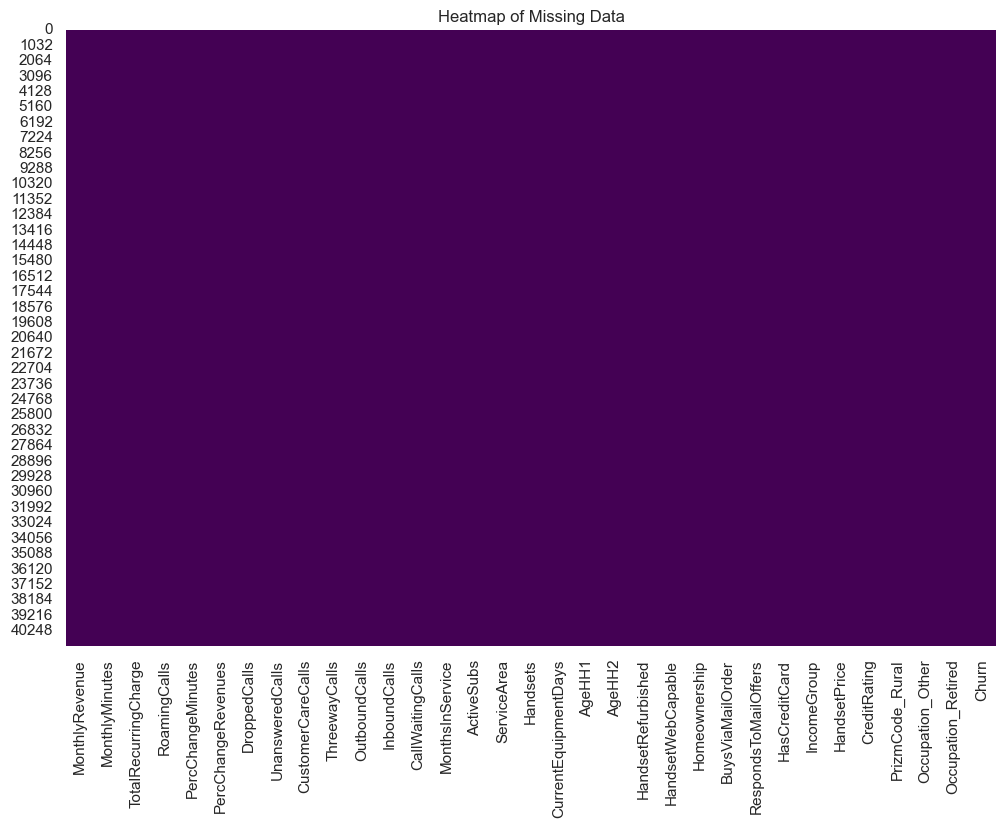

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

In [43]:
# Check for missing data
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for missing data numerically
missing_data = telecom_data_cleaned_scaled.isnull().sum()
missing_percentage = (missing_data / len(telecom_data_cleaned_scaled)) * 100

# Displaying missing data summary
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

# Plotting heatmap of missing data
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_data_cleaned_scaled.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# Display missing data numerically
missing_data_summary


In [44]:
# Drop rows with any missing (NaN) values
telecom_data_cleaned_scaled = telecom_data_cleaned_scaled.dropna()

# Display the cleaned DataFrame (with no missing records)
print(telecom_data_cleaned_scaled.head())


   MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  RoamingCalls  \
0        0.730893        1.085318              0.831516     -0.292264   
1       -0.723733       -0.640185             -0.719006     -0.252922   
2        2.009101        2.118940              1.606777     -0.095551   
3       -0.857250       -1.147192             -0.874059     -0.292264   
4       -0.671584       -0.833464             -0.615638     -0.292264   

   PercChangeMinutes  PercChangeRevenues  DroppedCalls  UnansweredCalls  \
0          -0.014466           -0.372822      0.610405         0.623203   
1          -0.820403            0.006871     -0.387336        -0.069224   
2          -0.661569           -0.037799     -0.498196         0.077916   
3           0.038479            0.038140     -0.812300        -0.904466   
4           0.026713            0.033673     -0.498196        -0.328885   

   CustomerCareCalls  ThreewayCalls  ...  BuysViaMailOrder  \
0          -0.348823      -0.395207  ...        

In [45]:
telecom_data_cleaned_scaled.to_csv("cell2cell_preprocess.csv", index=False)

In [46]:
# Check for NaN values in the entire DataFrame
nan_values = telecom_data_cleaned_scaled.isna().sum()

# Display columns with NaN values (if any)
print(nan_values[nan_values > 0])


Series([], dtype: int64)


# Data

In [47]:
data = telecom_data_cleaned_scaled.copy()
data

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  RoamingCalls  \
0            0.730893        1.085318              0.831516     -0.292264   
1           -0.723733       -0.640185             -0.719006     -0.252922   
2            2.009101        2.118940              1.606777     -0.095551   
3           -0.857250       -1.147192             -0.874059     -0.292264   
4           -0.671584       -0.833464             -0.615638     -0.292264   
...               ...             ...                   ...           ...   
41268        0.797466        0.880835              1.348357      0.061820   
41269        2.480292       -0.071554             -0.719006     -0.292264   
41270       -0.072795       -0.121974              0.056255     -0.292264   
41271        1.654783        3.740801              2.123618      1.556841   
41272       -0.072795       -0.121974              0.056255     -0.292264   

       PercChangeMinutes  PercChangeRevenues  DroppedCalls  UnansweredCalls  \
0              -0.014466           -0.372822      0.610405         0.623203   
1              -0.820403            0.006871     -0.387336        -0.069224   
2              -0.661569           -0.037799     -0.498196         0.077916   
3               0.038479            0.038140     -0.812300        -0.904466   
4               0.026713            0.033673     -0.498196        -0.328885   
...                  ...                 ...           ...              ...   
41268          -0.196831           -0.042266      1.829867         0.103883   
41269           0.038479            0.047074     -0.073232         0.264006   
41270           0.009065            0.033673      0.906032         1.185801   
41271           0.756175            0.757324      2.273307         0.882864   
41272           0.009065            0.033673     -0.812300        -0.904466   

       CustomerCareCalls  ThreewayCalls  ...  BuysViaMailOrder  \
0              -0.348823      -0.395207  ...         -0.774622   
1               2.040888       2.689305  ...         -0.774622   
2              -0.468309      -0.395207  ...         -0.774622   
3              -0.468309      -0.395207  ...         -0.774622   
4              -0.468309      -0.395207  ...          1.290953   
...                  ...            ...  ...               ...   
41268          -0.468309       3.638386  ...          1.290953   
41269          -0.468309      -0.395207  ...         -0.774622   
41270          -0.468309      -0.395207  ...          1.290953   
41271          -0.468309      -0.395207  ...          1.290953   
41272          -0.468309      -0.395207  ...         -0.774622   

       RespondsToMailOffers  HasCreditCard  IncomeGroup  HandsetPrice  \
0                 -0.799734       0.674853     0.187706     -0.738407   
1                 -0.799734       0.674853    -0.132545     -2.342380   
2                 -0.799734      -1.481803    -1.413547     -0.738407   
3                 -0.799734       0.674853     1.148458     -2.342380   
4                  1.250416      -1.481803    -0.132545     -0.738407   
...                     ...            ...          ...           ...   
41268              1.250416       0.674853     0.828207      0.665069   
41269             -0.799734       0.674853    -0.773046     -0.738407   
41270              1.250416       0.674853     0.507956      0.264076   
41271              1.250416       0.674853     1.468708      0.264076   
41272             -0.799734      -1.481803     1.468708     -0.738407   

       CreditRating  PrizmCode_Rural  Occupation_Other  Occupation_Retired  \
0          1.420085        -0.227204         -1.635018           -0.123697   
1          2.071480        -0.227204          0.611614           -0.123697   
2         -1.185493        -0.227204          0.611614           -0.123697   
3         -1.185493        -0.227204          0.611614           -0.123697   
4         -1.185493        -0.227204          0.611614           -0.12369

## Original Data

In [48]:
X = data.drop(columns="Churn")
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("----------------------------")
print("Original features shape, ", X.shape)
print("Original target shape, ", y.shape)
print("x train shape, ", X_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", X_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (41273, 32)
Original target shape,  (41273,)
x train shape,  (33018, 32)
y train shape,  (33018,)
x test shape,  (8255, 32)
y test shape,  (8255,)
----------------------------


## Upsampling Data

In [49]:
smote = SMOTE(random_state=42)
X_train_upsampled , y_train_upsampled = smote.fit_resample(X_train,y_train)
print("----------------------------")
print("Original x train shape, ", X_train.shape)
print("Resample x train shape, ", X_train_upsampled.shape)
print("----------------------------")

----------------------------
Original x train shape,  (33018, 32)
Resample x train shape,  (47200, 32)
----------------------------


## Downsampling data

In [50]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler(random_state=random_state)

# Fit and resample the training data
x_train_downsampled, y_train_downsampled = rus.fit_resample(X_train, y_train)

# Print shapes to compare
print("----------------------------")
print("Original x_train shape: ", X_train.shape)
print("Downsampled x_train shape: ", x_train_downsampled.shape)
print("----------------------------")


----------------------------
Original x_train shape:  (33018, 32)
Downsampled x_train shape:  (18836, 32)
----------------------------


# Build model

In [57]:
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]


## Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    tuned_params = {"models": []}  # Initialize the dictionary with a "models" key
    
    for i, model in enumerate(models):
        print(clsModelsNm[i])
        # Perform grid search
        grid = GridSearchCV(estimator=model, 
                            cv=5, 
                            param_grid=parameters[clsModelsNm[i]], 
                            scoring=score, 
                            n_jobs=1)
        grid.fit(x, y)
        
        # Extract best score and params
        best_score = grid.best_score_
        best_params = grid.best_params_
        
        # Print results for logging purposes
        print(f"Best score for {clsModelsNm[i]}: {best_score}")
        print(f"Best parameters for {clsModelsNm[i]}: {best_params}")
        
        # Append model information in the desired format
        tuned_params["models"].append({
            "name": clsModelsNm[i],  # Model name
            "hyperparameters": best_params,  # Best hyperparameters
            "negative_log_loss": best_score  # Score (you can change this key if it's another metric)
        })
    
    return tuned_params


In [52]:
import yaml

with open('../../configs/train_config_cell2cell.yaml', 'r') as file:
    model_params = yaml.safe_load(file)

scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']

### Original Data

In [212]:
og_clsLR = LogisticRegression(random_state=random_state)
og_clsRF = RandomForestClassifier(random_state=random_state)
og_clsXGB = XGBClassifier(random_state=random_state)
og_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
clsParams = model_params
tuned_params = Parameter_tunning(X_train, y_train, og_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Random Forest
Best score for Random Forest: -0.5658105509183302
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
Best score for Decision Tree: -0.6000204597608105
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression
Best score for Logistic Regression: -0.5823654324165372
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
XGBoost
Best score for XGBoost: -0.5836512786319475
Best parameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}


In [213]:
import yaml
# Write to original.yaml file
original_output_path = '../../model_artifact/training/cell2cell/original.yaml'
with open(original_output_path, 'w') as file:
    yaml.dump(tuned_params, file, default_flow_style=False)

print(f"Model information has been written to {original_output_path}")

Model information has been written to ../../model_artifact/training/cell2cell/original.yaml


### Upsampling

In [214]:
os_clsLR = LogisticRegression(random_state=random_state)
os_clsRF = RandomForestClassifier(random_state=random_state)
os_clsXGB = XGBClassifier(random_state=random_state)
os_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
clsParams = model_params
os_tuned_params = Parameter_tunning(X_train_upsampled, y_train_upsampled, os_clsModels, clsModelsNm, clsParams, 'neg_log_loss')

# Write to a YAML file
output_path = '../../model_artifact/training/cell2cell/oversampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(os_tuned_params, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
Best score for Random Forest: -0.5991539053915466
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
Best score for Decision Tree: -0.6116679242379938
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression
Best score for Logistic Regression: -0.6709879048349813
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
XGBoost
Best score for XGBoost: -0.47915977589693676
Best parameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/cell2cell/oversampling.yaml


### Downsampling

In [217]:
us_clsLR = LogisticRegression(random_state=random_state)
us_clsRF = RandomForestClassifier(random_state=random_state)
us_clsXGB = XGBClassifier(random_state=random_state)
us_clsDT = DecisionTreeClassifier(random_state=random_state)
clsModelsNm = ["Random Forest", "Decision Tree", "Logistic Regression", "XGBoost"]
us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
clsParams = model_params
us_tuned_params = Parameter_tunning(x_train_downsampled, y_train_downsampled, us_clsModels, clsModelsNm, clsParams, 'neg_log_loss')
# Write to a YAML file

output_path = '../../model_artifact/training/cell2cell/undersampling.yaml'
with open(output_path, 'w') as file:
    yaml.dump(us_tuned_params, file, default_flow_style=False)

print(f"Model information has been written to {output_path}")

Random Forest
Best score for Random Forest: -0.6562527115895467
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree
Best score for Decision Tree: -0.7025390047938291
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression
Best score for Logistic Regression: -0.6749170177389685
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
XGBoost
Best score for XGBoost: -0.6878268113697894
Best parameters for XGBoost: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Model information has been written to ../../model_artifact/training/cell2cell/undersampling.yaml


# Visualizing

In [53]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [54]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])])

## Original Data

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 1, 'max_iter': 100, 'solver': 'saga'}
XGBoost Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Random Forest
************************************************
Original data
accuracy  score: 0.717760006303689
precision  score: 0.662252501596764
recall  score: 0.02144835961046034
f1  score: 0.041349441650781124
neg_log_loss  score: -0.565836947552064


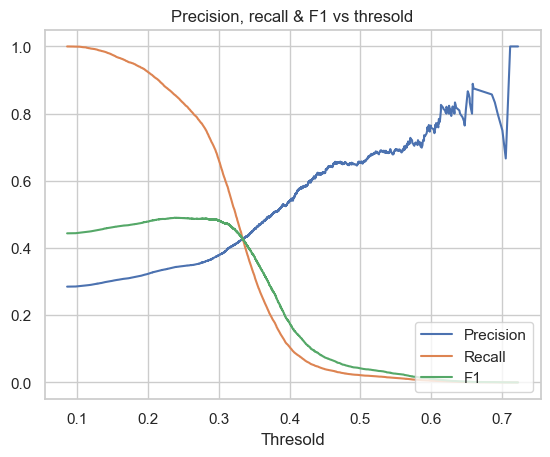

When F1 score is max 
       Precisions   Recalls        F1  Threshold
9614     0.34383  0.854428  0.490342   0.238957
Decision Tree
************************************************
Original data
accuracy  score: 0.7164577377186534
precision  score: 0.530315037046073
recall  score: 0.07443085017020092
f1  score: 0.1291859740308207
neg_log_loss  score: -0.5977420755988792


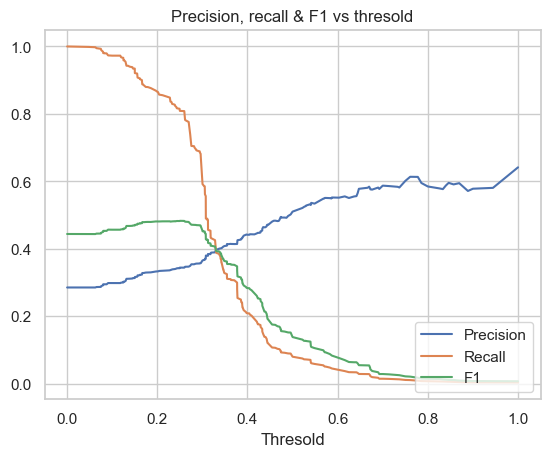

When F1 score is max 
     Precisions   Recalls        F1  Threshold
68     0.34419  0.808983  0.482918       0.25
Logistic Regression
************************************************
Original data
accuracy  score: 0.7135805008699221
precision  score: 0.4484074069005576
recall  score: 0.015608703642942274
f1  score: 0.030129058472970465
neg_log_loss  score: -0.5823655050970726


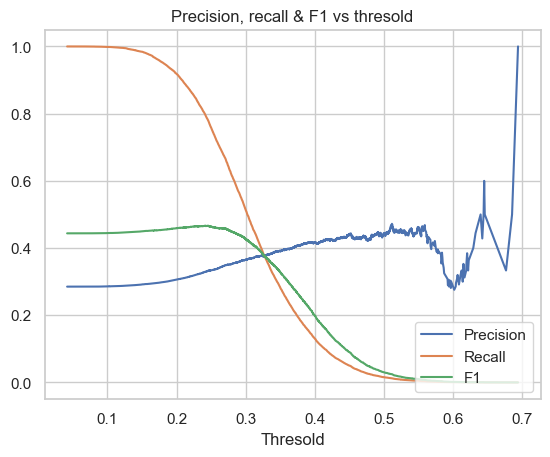

When F1 score is max 
        Precisions   Recalls        F1  Threshold
10205    0.329374  0.797834  0.466259   0.241372
XGBoost
************************************************
Original data
accuracy  score: 0.7140953724666569
precision  score: 0.4969592320858931
recall  score: 0.19632588147611946
f1  score: 0.2814178440106008
neg_log_loss  score: -0.5836512786319475


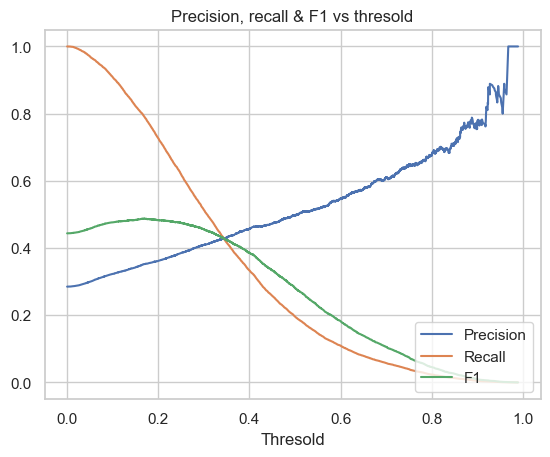

When F1 score is max 
        Precisions   Recalls        F1  Threshold
11884    0.352596  0.791038  0.487773   0.170277


In [60]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/cell2cell/original.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
og_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
og_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
og_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
og_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", og_random_forest_params)
print("Decision Tree Parameters:", og_decision_tree_params)
print("Logistic Regression Parameters:", og_logistic_regression_params)
print("XGBoost Parameters:", og_xgboost_params)

# Build model and evaluate
og_clsDT = DecisionTreeClassifier(**og_decision_tree_params)
og_clsLR = LogisticRegression(**og_logistic_regression_params)
og_clsXGB = XGBClassifier(**og_xgboost_params)
og_clsRF = RandomForestClassifier(**og_random_forest_params)

og_clsModels = [og_clsRF, og_clsDT, og_clsLR, og_clsXGB]
Cross_validation_score(og_clsModels, clsModelsNm, [(X_train, y_train,'Original data')], scoreMatrix)

## Upsampling data

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
XGBoost Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Random Forest
************************************************
Upsamping data
accuracy  score: 0.6834533898305085
precision  score: 0.6601449131331816
recall  score: 0.7093220338983051
f1  score: 0.6733047361378459
neg_log_loss  score: -0.599690763674534


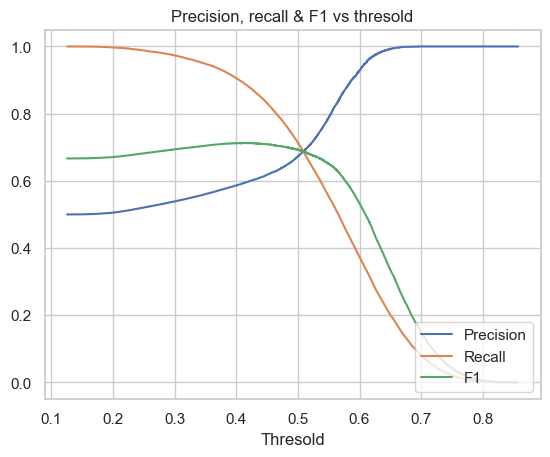

When F1 score is max 
        Precisions   Recalls        F1  Threshold
11871    0.594384  0.889788  0.712688   0.413386
Decision Tree
************************************************
Upsamping data
accuracy  score: 0.6100635593220339
precision  score: 0.6060323668596503
recall  score: 0.536949152542373
f1  score: 0.5297836005322065
neg_log_loss  score: -0.6116080548897573


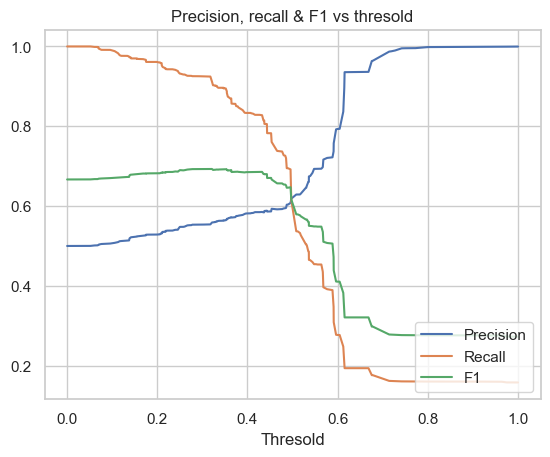

When F1 score is max 
     Precisions   Recalls        F1  Threshold
64    0.558801  0.911864  0.692953   0.321256
Logistic Regression
************************************************
Upsamping data
accuracy  score: 0.5885169491525424
precision  score: 0.583895724092468
recall  score: 0.6156779661016949
f1  score: 0.5993530115119962
neg_log_loss  score: -0.6709879048349813


C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\381732776.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")


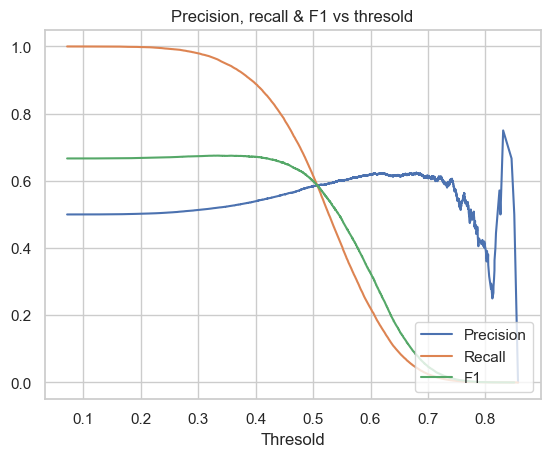

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13380\3138009618.py:22: RuntimeWarning: invalid value encountered in divide
  ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])


When F1 score is max 
       Precisions   Recalls        F1  Threshold
3652    0.520552  0.960551  0.675195   0.335233
XGBoost
************************************************
Upsamping data
accuracy  score: 0.7706779661016949
precision  score: 0.8331293608084707
recall  score: 0.6441101694915254
f1  score: 0.6383944914160418
neg_log_loss  score: -0.47915977589693676


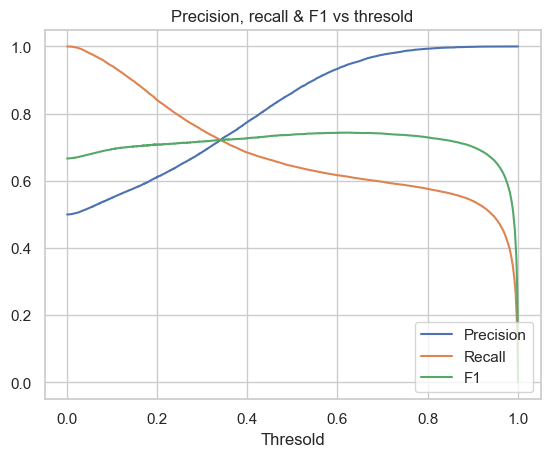

When F1 score is max 
        Precisions   Recalls        F1  Threshold
31879    0.945836  0.612669  0.743642   0.622106


In [61]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/cell2cell/oversampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
os_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
os_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
os_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
os_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", os_random_forest_params)
print("Decision Tree Parameters:", os_decision_tree_params)
print("Logistic Regression Parameters:", os_logistic_regression_params)
print("XGBoost Parameters:", os_xgboost_params)

# Build model and evaluate
os_clsDT = DecisionTreeClassifier(**os_decision_tree_params)
os_clsLR = LogisticRegression(**os_logistic_regression_params)
os_clsXGB = XGBClassifier(**os_xgboost_params)
os_clsRF = RandomForestClassifier(**os_random_forest_params)

os_clsModels = [os_clsRF, os_clsDT, os_clsLR, os_clsXGB]
Cross_validation_score(os_clsModels, clsModelsNm, [(X_train_upsampled, y_train_upsampled,'Upsamping data')], scoreMatrix)

## Undersampling

Random Forest Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 400}
Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 7}
Logistic Regression Parameters: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
XGBoost Parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 400, 'reg_alpha': 0.01, 'reg_lambda': 1}
Random Forest
************************************************
Undersampling data
accuracy  score: 0.6074006330537233
precision  score: 0.5872155873660367
recall  score: 0.7161819971518548
f1  score: 0.6469592902120029
neg_log_loss  score: -0.6563565274995918


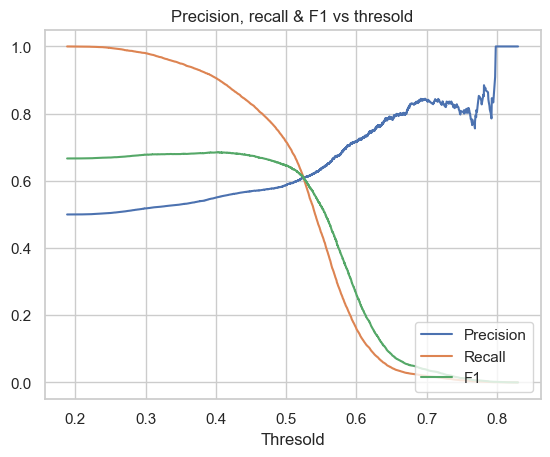

When F1 score is max 
       Precisions   Recalls        F1  Threshold
3363    0.551024  0.905288  0.685067   0.400855
Decision Tree
************************************************
Undersampling data
accuracy  score: 0.5891371148599104
precision  score: 0.5819978973810855
recall  score: 0.658657470517864
f1  score: 0.6114242251848101
neg_log_loss  score: -0.6987422464910242


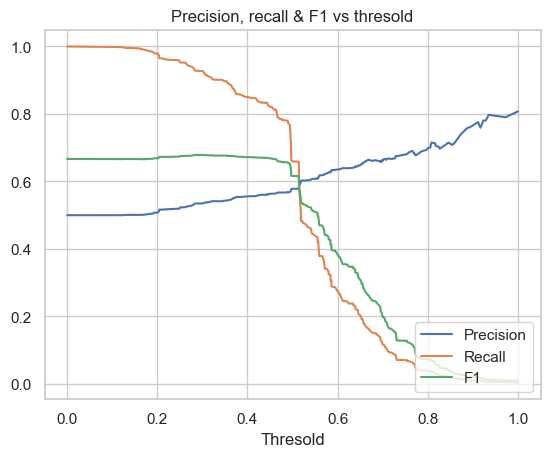

When F1 score is max 
     Precisions   Recalls        F1  Threshold
37     0.53454  0.928435  0.678461   0.283333
Logistic Regression
************************************************
Undersampling data
accuracy  score: 0.5817053983723891
precision  score: 0.5809950564077381
recall  score: 0.5860053016542018
f1  score: 0.5834540477251677
neg_log_loss  score: -0.6749170177389685


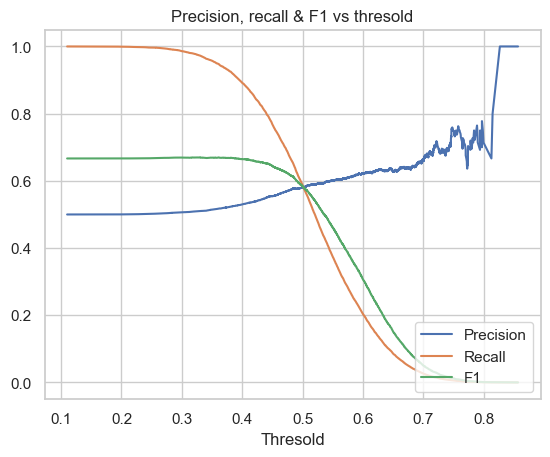

When F1 score is max 
      Precisions   Recalls        F1  Threshold
772    0.509466  0.977171  0.669747   0.322924
XGBoost
************************************************
Undersampling data
accuracy  score: 0.6094705135727236
precision  score: 0.607721913773028
recall  score: 0.6177533253729593
f1  score: 0.6126693816331599
neg_log_loss  score: -0.6878268113697894


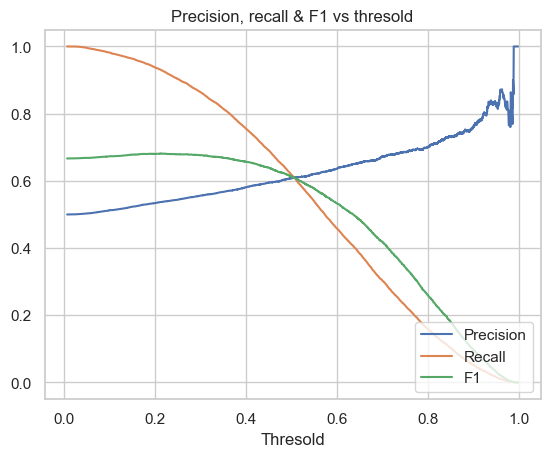

When F1 score is max 
       Precisions   Recalls        F1  Threshold
2501    0.537006  0.931408  0.681241    0.21184


In [62]:
import yaml

# Load the YAML file
with open('../../model_artifact/training/cell2cell/undersampling.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Get the list of models
models = config["models"]

# Extract hyperparameters for each model
us_random_forest_params = next(model['hyperparameters'] for model in models if model['name'] == 'Random Forest')
us_decision_tree_params = next(model['hyperparameters'] for model in models if model['name'] == 'Decision Tree')
us_logistic_regression_params = next(model['hyperparameters'] for model in models if model['name'] == 'Logistic Regression')
us_xgboost_params = next(model['hyperparameters'] for model in models if model['name'] == 'XGBoost')

# Print the hyperparameters for each model
print("Random Forest Parameters:", us_random_forest_params)
print("Decision Tree Parameters:", us_decision_tree_params)
print("Logistic Regression Parameters:", us_logistic_regression_params)
print("XGBoost Parameters:", us_xgboost_params)

# Build model and evaluate
us_clsDT = DecisionTreeClassifier(**us_decision_tree_params)
us_clsLR = LogisticRegression(**us_logistic_regression_params)
us_clsXGB = XGBClassifier(**us_xgboost_params)
us_clsRF = RandomForestClassifier(**us_random_forest_params)

us_clsModels = [us_clsRF, us_clsDT, us_clsLR, us_clsXGB]
Cross_validation_score(us_clsModels, clsModelsNm, [(x_train_downsampled, y_train_downsampled,'Undersampling data')], scoreMatrix)

# Model Evaluation

In [65]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [66]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

## Original Data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.86      0.36      0.51      5889
           1       0.35      0.85      0.49      2366

    accuracy                           0.50      8255
   macro avg       0.60      0.60      0.50      8255
weighted avg       0.71      0.50      0.50      8255

*******************************************
Log loss score 0.57
*******************************************
Confusion matrix


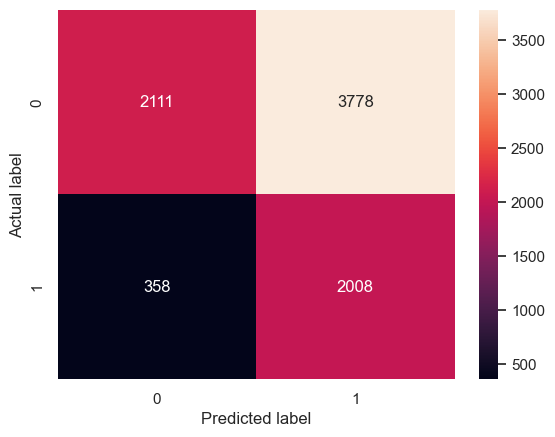

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.83      0.38      0.52      5889
           1       0.34      0.81      0.48      2366

    accuracy                           0.50      8255
   macro avg       0.59      0.59      0.50      8255
weighted avg       0.69      0.50      0.51      8255

*******************************************
Log loss score 0.59
*******************************************
Confusion matrix


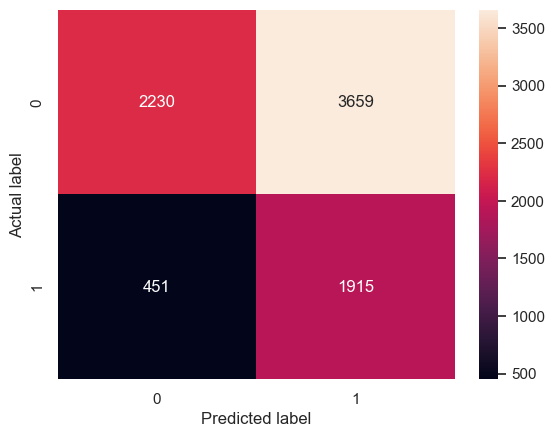

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.80      0.35      0.48      5889
           1       0.32      0.78      0.46      2366

    accuracy                           0.47      8255
   macro avg       0.56      0.56      0.47      8255
weighted avg       0.66      0.47      0.48      8255

*******************************************
Log loss score 0.59
*******************************************
Confusion matrix


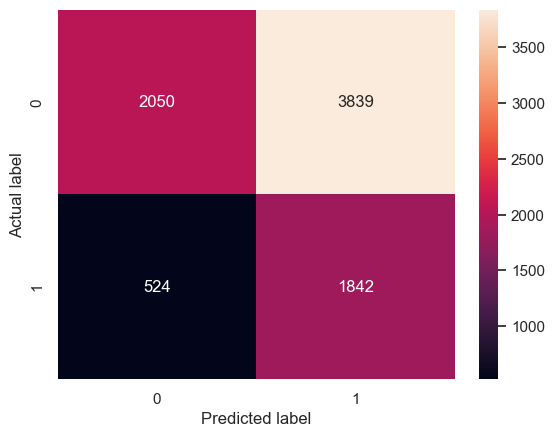

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.83      0.40      0.54      5889
           1       0.35      0.79      0.48      2366

    accuracy                           0.51      8255
   macro avg       0.59      0.60      0.51      8255
weighted avg       0.69      0.51      0.53      8255

*******************************************
Log loss score 0.59
*******************************************
Confusion matrix


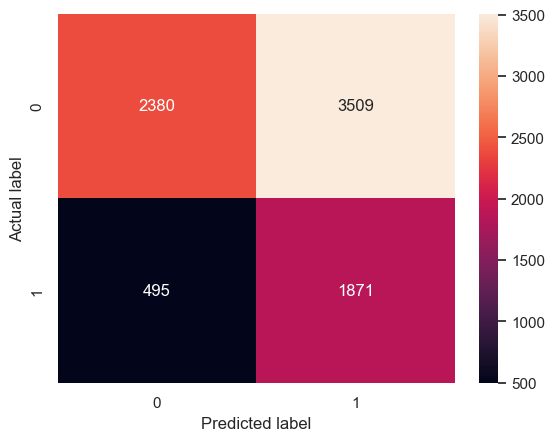

*******************************************


In [67]:
og_lr_threshold = 0.241372
og_dt_threshold = 0.25
og_rf_threshold = 0.238957
og_xgb_threshold = 0.170277
Model_evaluation(og_clsModels
                 , clsModelsNm
                 , X_train
                 , y_train
                 , X_test
                 , y_test
                 , [og_rf_threshold
                    ,og_dt_threshold
                    , og_lr_threshold
                    , og_xgb_threshold] )


## Upsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.84      0.36      0.51      5889
           1       0.34      0.83      0.48      2366

    accuracy                           0.50      8255
   macro avg       0.59      0.60      0.50      8255
weighted avg       0.70      0.50      0.50      8255

*******************************************
Log loss score 0.63
*******************************************
Confusion matrix


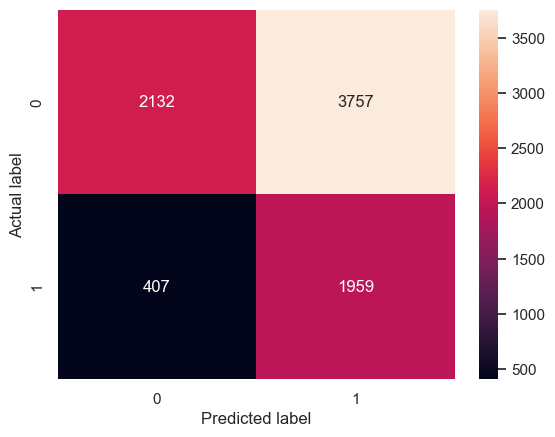

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.83      0.31      0.46      5889
           1       0.33      0.84      0.48      2366

    accuracy                           0.47      8255
   macro avg       0.58      0.58      0.47      8255
weighted avg       0.69      0.47      0.46      8255

*******************************************
Log loss score 0.64
*******************************************
Confusion matrix


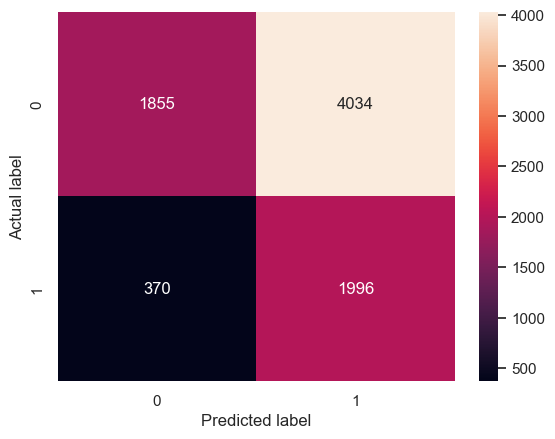

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.84      0.10      0.17      5889
           1       0.30      0.96      0.45      2366

    accuracy                           0.34      8255
   macro avg       0.57      0.53      0.31      8255
weighted avg       0.69      0.34      0.25      8255

*******************************************
Log loss score 0.68
*******************************************
Confusion matrix


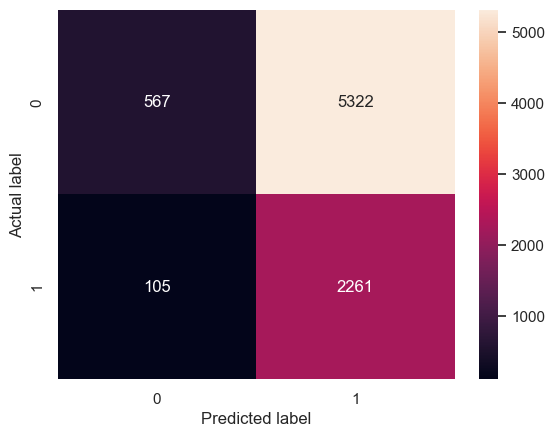

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.83      0.46      0.59      5889
           1       0.36      0.77      0.49      2366

    accuracy                           0.55      8255
   macro avg       0.60      0.61      0.54      8255
weighted avg       0.70      0.55      0.56      8255

*******************************************
Log loss score 0.58
*******************************************
Confusion matrix


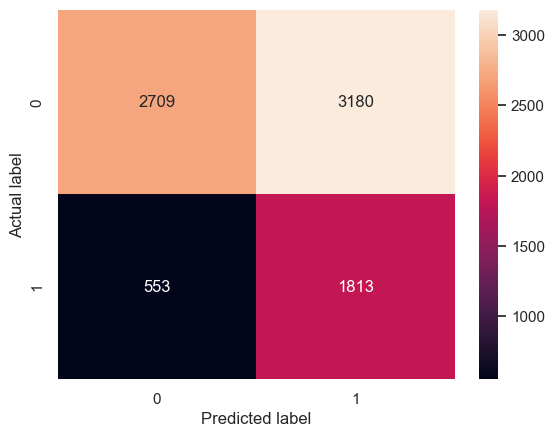

*******************************************


In [68]:
os_lr_threshold = 0.322924
os_dt_threshold = 0.283333
os_rf_threshold = 0.400855
os_xgb_threshold = 0.21184
Model_evaluation(os_clsModels
                 , clsModelsNm
                 , X_train_upsampled
                 , y_train_upsampled
                 , X_test
                 , y_test
                 , [os_rf_threshold
                    ,os_dt_threshold
                    , os_lr_threshold
                    , os_xgb_threshold] )


## Downsampling data

*********** Random Forest *************
              precision    recall  f1-score   support

           0       0.83      0.41      0.55      5889
           1       0.35      0.80      0.49      2366

    accuracy                           0.52      8255
   macro avg       0.59      0.60      0.52      8255
weighted avg       0.69      0.52      0.53      8255

*******************************************
Log loss score 0.66
*******************************************
Confusion matrix


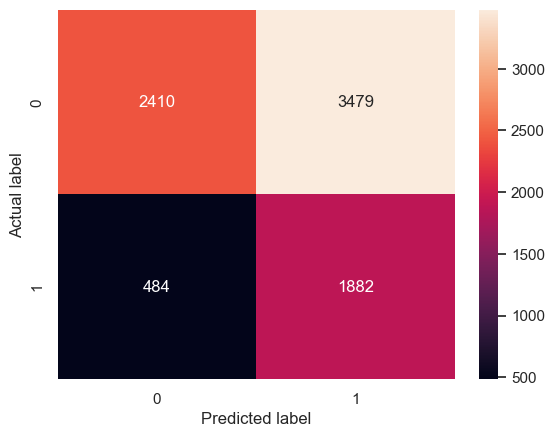

*******************************************
*********** Decision Tree *************
              precision    recall  f1-score   support

           0       0.85      0.32      0.47      5889
           1       0.34      0.86      0.48      2366

    accuracy                           0.47      8255
   macro avg       0.59      0.59      0.47      8255
weighted avg       0.70      0.47      0.47      8255

*******************************************
Log loss score 0.71
*******************************************
Confusion matrix


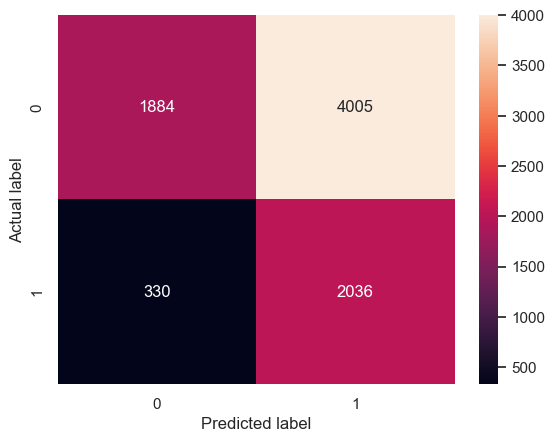

*******************************************
*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       0.81      0.23      0.36      5889
           1       0.31      0.86      0.46      2366

    accuracy                           0.41      8255
   macro avg       0.56      0.55      0.41      8255
weighted avg       0.66      0.41      0.38      8255

*******************************************
Log loss score 0.68
*******************************************
Confusion matrix


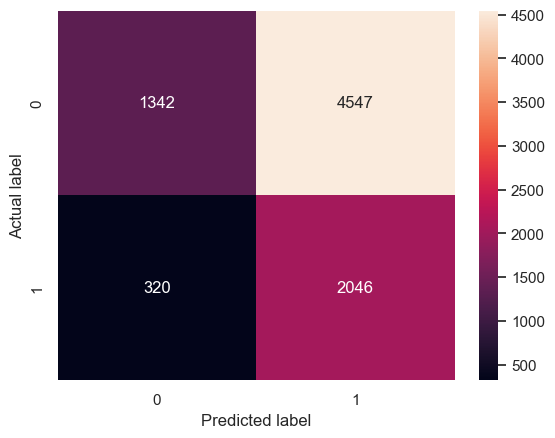

*******************************************
*********** XGBoost *************
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5889
           1       0.41      0.49      0.45      2366

    accuracy                           0.65      8255
   macro avg       0.59      0.60      0.59      8255
weighted avg       0.67      0.65      0.66      8255

*******************************************
Log loss score 0.69
*******************************************
Confusion matrix


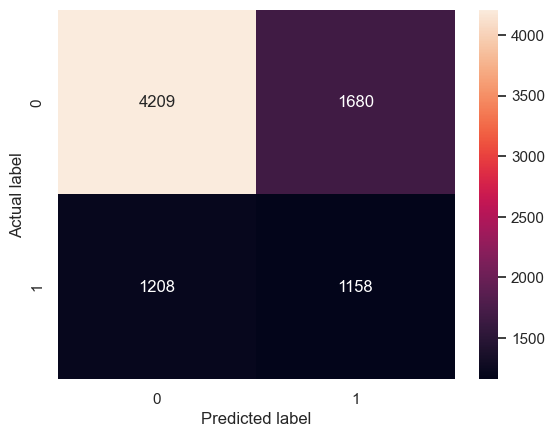

*******************************************


In [69]:
us_lr_threshold = 0.409897
us_dt_threshold = 0.384615
us_rf_threshold = 0.46325
us_xgb_threshold = 0.57395
Model_evaluation(us_clsModels
                 , clsModelsNm
                 , x_train_downsampled
                 , y_train_downsampled
                 , X_test
                 , y_test
                 , [us_rf_threshold
                    ,us_dt_threshold
                    , us_lr_threshold
                    , us_xgb_threshold] )
